# Machine-aided detection of sources in Jinpingmei: Style, text classification, and the complex textual antecedents of a late sixteenth century Chinese novel.

 ### Paul  Vierthaler[![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-2135-9499)
Princeton University

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/)
©Paul Vierthaler. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


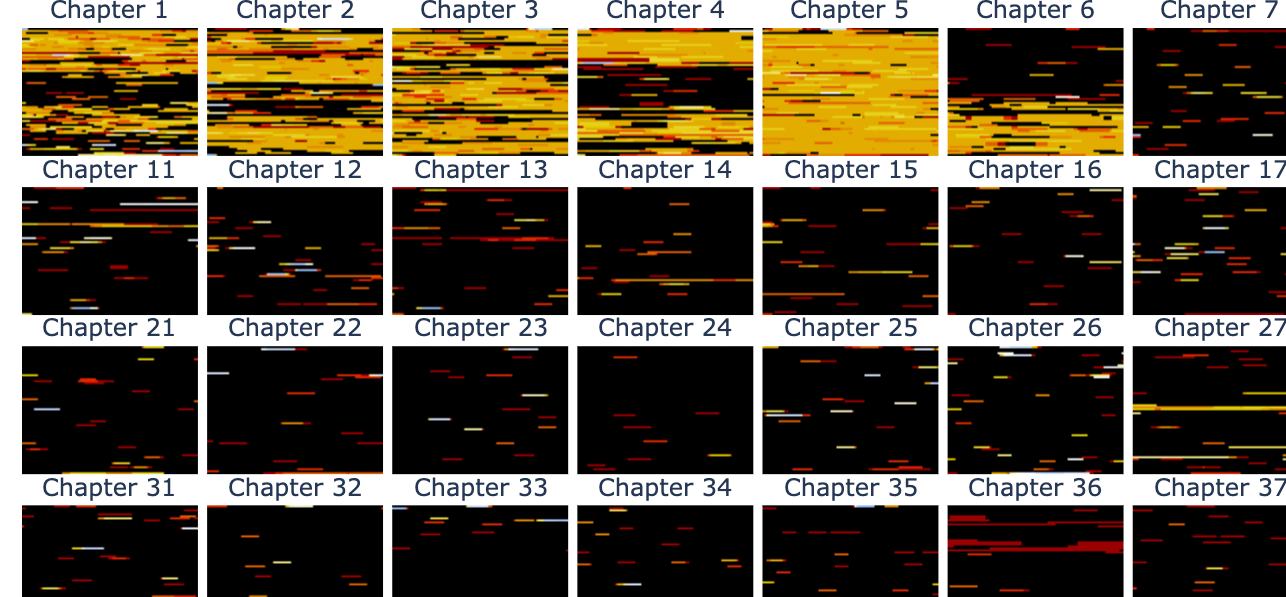

In [4]:
from IPython.display import Image, display

display(Image("./media/cover.png"))

textual history, source detection, machine learning, digital humanities, ming dynasty fiction, chinese fiction

The infamous late sixteenth century novel _Jinpingmei_ (_Plum in the Golden Vase_) is renowned as one of the greatest novels of the Chinese tradition and is famed for its extensive intertextuality and complex appropriation of earlier cultural material. The pseudonymous author of Jinpingmei spins a masterful and highly pornographic story out of a brief episode from an earlier novel Shuihu zhuan (Water Margin) and peppers the adapted narrative with intrusions of material from a dizzying array of external works with seemingly no regard for the boundaries of genre. This complex intertextual landscape has attracted the attention of scholars in the hundreds of years since the novel first began to circulate, but now computational methods enable us to systematically reconstruct the novel’s textual origins. In this paper, I propose a methodology to broaden our understanding of this intertextuality using machine-learning based text classifiers to identify the likely textual origin of each instance of text reuse identified within a digital corpus, using the intuition that materials endogenous to _Jinpingmei_ will be more stylistically similar to the rest of the novel than exogenous materials (and conversely, that external materials will more greatly resemble the external work than _Jinpingmei_). In this piece, I demonstrate the value and pitfalls of machine-aided detection of source material when working with complex textual artifacts like _Jinpingmei_ and comment on the broader applicability of these methods to other literary works from China.

## Introduction

The earliest extant edition of the late Ming novel _Jinpingmei_ (_Plum in the Golden Vase_ 金瓶梅), known as the _cihua_ 詞話 or Wanli 萬曆 edition (named after the Wanli reign, 1570--1620), hereafter _Jinpingmei_, opens not with original material but with a reference to an older ci lyric poem:

> The hero grips his “Hook of Wu.” Eager to cut off ten thousand heads. How is it that a heart forged out of iron and stone, can yet be melted by a flower? Just take a look at Hsiang Yü and Liu Pang: Both cases are equally distressing. They only had to meet with Yü-chi and Lady Ch’i for all their valor to come to naught” (<cite id="5msjh"><a href="#zotero%7C7306679%2FX6CT5F9A">(Roy, 1997)</a></cite>, 12).
詞曰：「丈夫只手把吳鉤，欲斬萬人頭。如何鐵石打成心性，卻為花柔。請看項籍並劉季，一似使人愁；只因撞著虞姬戚氏，豪傑都休。」

Widely viewed as a masterpiece and one of the most important and innovative works in the Chinese literary tradition, the anonymously written _Jinpingmei_ was unique, experimental, and extremely controversial. The novel touches on a myriad of social, political, religious, and moral issues through the lens of a pornographic story and is viewed as an important allegory lampooning late Ming society. Yet despite the novel’s unique place in Chinese literary history, this very first passage, and significant portions of the novel as a whole, is not original. As Patrick Hanan points out, this same lyric poem (with only very minor differences) can be found in the late fifteenth century Hong Pian’s 洪楩 Qingpingshantang huaben (Huaben from Qingping Mountain Hall 清平山堂話本), a collection of short stories referenced throughout _Jinpingmei_ (<cite id="hj4hq"><a href="#zotero%7C7306679%2FJIV3M8QJ">(Hanan, 1963)</a></cite>, 25). Critically for Hanan’s argument, it is not just the poem that is copied; the novel reproduces the explanation for the poem that immediately follows nearly verbatim:

> The subject of this lyric is the words passion and beauty, two concepts that are related to each other as substance is to function. Thus, when beauty bedazzles the eye, passion is born in the heart. Passion and beauty evoke from ancient times until the present day, gentlemen of moral cultivation ought never to forget. As two men of the Chin dynasty once said, “It is people just like ourselves who are most affected by passion (<cite id="irnsb"><a href="#zotero%7C7306679%2FX6CT5F9A">(Roy, 1997)</a></cite>, 12).
此一只詞兒上詩詞各一首，單說著情色二字，乃一體一用也。故色絢於目，情感於心，情色相生，心目相視。雖亙古及迄今，仁人君子，弗合能忘之。晉人云：「情之所鍾，正在我輩。」

Patrick Hanan uses this as evidence that the author of _Jinpingmei_ was almost certainly copying the _Wenjing yuanyang hui_ 刎頸鴛鴦會 short story within _Qingpingshan_, though this story in turn owes parts of its composition to even older works; buried within this short section of text are references to older materials from the Song, Yuan, and Ming dynasties.

Opening the novel with recycled material immediately primes the reader to expect such moves throughout the novel. The _cihua_ edition immediately pivots from this relatively short instance of intertextuality to a more widely recognized, and much longer, adaptation of material from the novel _Shuihu zhuan_ (_Water Margin_ 水滸傳). After the significant opening interlude, the novel constantly returns to earlier material. The complex intertextual references within _Jinpingmei_ are so dense that well over five percent of the novel derives from earlier sources.

Contemporary readers would have been steeped in the quoted works, and these references would have likely elicited a variety of responses dependent on knowledge of the earlier works. Yet even they clearly found this material difficult, and very few modern readers have enough insight into the sources to fully appreciate the effect they have on the novel. Many details of this intertextuality remain elusive, even in terms of the most clear cases. For example, the specific version of the _Water Margin_ the author used is some matter of debate, and Hanan argues that the source edition is distinct from the many currently extant versions. These problems are not unique to modern readers either, as late imperial readers clearly felt the _Water Margin’s_ influence on _Jinpingmei_ controversial. Later editions of the _Jinpingmei_, such as the much more popular Chongzhen-era (1628--1644) edition, significantly reframe the relationship between the two novels by excising and editing large amounts of the shared text.

Following the permutations of textual adaptation within the novel offers a deeper understanding of the work, but it is an arduous process that requires an extremely in-depth knowledge of the works circulating when _Jinpingmei_ was written. _Jinpingmei’s_ role as an exemplar in the art of textual appropriation makes it a perfect test case for developing digital methods for automatic detection of intertextuality and disambiguation of sources. Patrick Hanan’s 1963 article “Sources of the Chin P’ing Mei” is a masterclass in textual scholarship, in which he identifies many of the works directly copied within the novel. But digital methods and materials open the door to such detailed scholarship much more widely. Critically, they allow me to generate a generalizable approach that works beyond the case of _Jinpingmei_ that may be valuable in studying all manner of literary and historical materials.

In prior work I developed and adapted a method that makes identifying instances of intertextuality at corpus scale feasible (<cite id="mvu3r"><a href="#zotero%7C7306679%2FQ5RWL8KK">(Vierthaler and Gelein)</a></cite>). However, this approach left the issue of quotational direction unanswered, providing no clarity in terms of which text was quoting which. In this article, I discuss experiments I have been conducting that leverage stylistic signals found within digital corpora and intertextual material to computationally identify the textual antecedents deployed so readily within _Jinpingmei_. This process is critical for revealing more about the nature of _Jinpingmei_ as a heteroglossic, intertextual work, but it also leads to the creation of tools useful for studying textual sources within Chinese materials writ large. Specifically, I will introduce a workflow in which I train various machine-learning models that operate on stylistic markers (primarily the relative use of certain words/characters) to evaluate the likely direction of textual sharing between _Jinpingmei_ and related works. This process rests on the general assumption that a quote is more similar to the text it originates from than to the text is has been inserted into. This is primarily useful for cases where the quotational direction cannot be ascertained through purely chronological means, developing an approach to identifying quotations that is not possible absent computational analysis.

The workflow and tools I show here have the potential to expand the study of source materials in Chinese corpora far beyond the use cases found within _Jinpingmei_. The work in this article is also leading into a future study of the stylistic nature of _Jinpingmei_ that illustrates how intertextuality and reliance on materials of multiple different genres influences the style of the novel.

## Acquiring and prepping the corpus

The quality of any large-scale textual analysis depends on the digital corpus that undergirds the research. It is only thanks to work by people who have digitized a large portion of imperial Chinese writing that it is now possible to leverage computational analysis to understand the works that influence any given text on a macro scale. I base the analysis in this paper on digitized texts derived from a number of online repositories: the Kanseki repository (<cite id="joo9r"><a href="#zotero%7C7306679%2FDQWSWW9F">(Wittern, n.d.)</a></cite>), the Daizhige repository (<cite id="yiwba"><a href="#zotero%7C7306679%2FFKPTBEI3">(<i>Daizhige</i>, n.d.)</a></cite>),  Chinese Wikisource (<cite id="n3mbd"><a href="#zotero%7C7306679%2FW6A6XI55">(<i>Chinese Wikisource</i>, n.d.)</a></cite>),  as well as a number of other open-source collections including Project Gutenberg (<cite id="4575r"><a href="#zotero%7C7306679%2FBH5CH376">(<i>Project Gutenberg</i>, n.d.)</a></cite>) and _Kaifang wenxue_ (<cite id="ajer5"><a href="#zotero%7C7306679%2FF35QNXA6">(<i>Open Lit</i>, n.d.)</a></cite>).

I first clean the texts in order to facilitate the identification of shared textual materials across different digital corpora. This involves removing materials not likely present in the original works, from punctuation to errant HTML. I also normalize the Chinese character sets across documents by transforming the texts into simplified characters. This is necessary because the corpus comprises materials in both traditional and simplified character sets. Ideally, I would transform the simplified documents into traditional ones. However, because a significant number of traditional characters were simplified from multiple characters into a single simplified graph, it is difficult to automatically transform a simplified text into a traditional one. Going in the other direction loses some information but ensures a uniform, deterministic character set. I removed duplicate materials in cases where a particular edition of a text exists as multiple _digital_ copies across this corpus, but I do retain different editions of texts if they represent a unique printed piece. For most of the analysis, I also ensured that I have a rough date of composition for every text. In cases where it is not clear what dynasty a work is from, I still conduct the intertextual search across the material but leave it out of the bulk of analysis. I also excluded all editions of the _Jinpingmei_ from the comparative corpus to simplify the analysis.

Given that my primary focus is on identifying the sources of _Jinpingmei_, simply knowing if a text that shares material with _Jinpingmei_ was written before the novel is enough to establish that the materials is not original to _Jinpingmei_, though not necessarily to identify its ultimate origin. As such, dating the works in the corpus becomes critical. This is complicated by the fact that the exact date of writing of _Jinpingmei_ is not clear: it was almost certainly written in the second half of the sixteenth century and finished no later than 1606, when we have evidence that full copies of manuscript versions of the text were circulating. Shen Defu discusses the existence of several full copies of the manuscript in the _Wanli yehuo bian_ 萬曆野獲編, referring to an incident that occurred in 1606 in which he discussed the novel with Yuan Hongdao. Shen references a complete copy owned by Xu Wenzhen (1503-1583), pushing likely completion back to at least the late sixteenth century (<cite id="8k51v"><a href="#zotero%7C7306679%2FMB79B7AA">(Xu, 2011)</a></cite>, 72). In including materials written roughly before, concurrently to, and after _Jinpingmei_, I can get a deep view of its influences and the impact it has on later materials. In the end, the analysis corpus I use contains 20,637 texts totaling around 1.58 billion characters. The details of the subset of works that share text with _Jinpingmei_ are described in the table below:

| Temporal Relation to _JPM_    | Number of Texts | Total Characters  |
| -------- | ------- | ------ |
| Predates  | 1,560 | 326,606,139 |
| Contemporary/Unknown | 1,406 | 292,256,678 |
| Postdates | 1,599 | 492,891,996 |
| Totals | 4,565 | 1,111,754,813 |

The quality of the corpus heavily influences the results of any corpus-based research. Transcription errors could influence the results, for example. When comparing two different editions of the same work, it is important to remember that modern digitizers might have introduced many of the differences, so the digital editions may not completely reflect the original works. However, given the breadth of analysis, as long as the transcription errors are not systematically biased, they should not have a significant influence on the results at hand.

It is also the case that the scope of analysis is limited by works represented within the corpus: I can often trace the likely source of a given chunk of text but I can only go as far back as the corpus allows, and it is entirely possible that the corpus does not contain the ultimate source. Still, the material represented by the corpus here offers an excellent starting place for comprehensively studying _Jinpingmei's_ source material.

## Identifying Intertexuality

The first step in computationally identifying the sources of _Jinpingmei_ is to compare the novel against all materials within the corpus. While it is relatively simple to identify sections of text which are direct quotations, often the original is not preserved exactly; the author of _Jinpingmei_ clearly felt at liberty to edit materials he incorporated into the novel. As such, I use an algorithm based on bioinformatic’s Basic Local Alignment Search Tool (BLAST) to ensure that as long as there is a set amount of similarity between _Jinpingmei_ and the comparison text, I identify all shared material. This method, and the software that implements it, is described in Vierthaler and Gelein, 2019.

There are a variety of other methods one could use to detect intertextuality found in the _Jinpingmei_ (or any other work for that matter), including approaches developed by Donald Sturgeon (as described in (<cite id="ns4la"><a href="#zotero%7C7306679%2FP52MDVIJ">(Sturgeon, 2018)</a></cite>)) or by Jeffery Tharsen and Clovis Gladstone (as described in (<cite id="p1l0n"><a href="#zotero%7C7306679%2FENPVXQXJ">(Tharsen &#38; Gladstone, 2020)</a></cite>)). The advantage the BLAST-based method has is that it is optimized to work in a Python-based workflow run locally on large corpora. The flexibility this gives allows me to rapidly prototype new output formats and facilitate downstream analysis.

When I perform the intertextuality analysis, I look for all sequences of at least ten sequential characters in the _Jinpingmei_ that are at least 80 percent the same as sequences of text found in works in the target corpus. I calculate this 80 percent similarity using Levenshtein distance, which essentially measures the edit distance between two strings by calculating how many edits change one string into another. So for a 10-character string, 2 edits are allowable. For a 100-character string, 20 are allowable, and so on. I also align and clean the results for easier display and interpretability, which includes dropping mismatched trailing characters (so the alignment dataset contains many identical 8-character strings).  

While the exact parameters I use for searching are somewhat arbitrary, I arrived at these in an attempt to find a balance between noise and comprehensive results (that is to say, I balance precision and recall). The shorter and less similar a sequence I allow, the more likely I will find random, rather than meaningful, instances of reuse. Longer and stricter parameters generate less noisy results, but often miss interesting cases of reuse. A search using these 10 character, 80 percent parameters identifies approximately 537,000 cases of textual reuse in the corpus, involving 13,300 unique quotes across 4,565 unique texts. The results are broken down depending on their temporal relationship with _Jinpingmei_ in the following table:

| Temporal Relation to _JPM_    | Number of quotes | Unique quotes | Total characters in unique quotes |
| -------- | ------- | ------ | ------ |
| Predates  | 49,004 | 3,228 |82,760|
| Contemporary/Unknown | 99,054 | 3,658 |37,157|
| Postdates | 389,364 | 10,792 |742,677|

Some of these instances are short and extremely common; some ten characters sequences appear dozens of times per text across hundreds of texts. Others are long and uncommon, spanning hundreds of characters and shared only with one other text in the corpus. One notable phenomenon is that quotes linked to unkown/contemporary works are more common than those that predate _Jinpingmei_, but they also tend to be much shorter in length. Note that this approach does not capture extensive paraphrasing or allusions. This would be very useful to capture, but it is much more complex and computationally intensive.

Following the identification of these instances of textual reuse, I sort the quotes into multiple categories: quotes that represents structural language inherent to a given genre, quotes from works that predate _Jinpingmei_, quotes from works roughly contemporary with _Jinpingmei_, quotes from works that postdate _Jinpingmei_, and quotes from works of unknown date. This basic categorization schema then lets me delve into the influences on, and of, _Jinpingmei_. To do so I am using tools derived from stylometric analysis and machine-learning to develop text classification models that establish the likely origin of textual material. I first establish the efficacy of such models and their potential pitfalls by testing them on a variety of known cases: the _Qingpingshantang huaben_, Li Kaixian’s _Cinue_ 詞謔, and the _Water Margin_, before then attempting to ascertain the likely origin of contemporary and unknown materials.

## The nature of intertextuality in _Jinpingmei_

Endeavoring to computationally identify meaningful text reuse in _Jinpingmei_ necessitates a careful look at what types of language are generally repeated throughout Chinese literature. While the raw results of the intertextuality analysis are comprehensive, at least to the extent that they account for all instances of reuse within the corpus at hand, they are not particularly illuminating in and of themselves. The first major concern has to do with the sensitivity of the algorithm to stock or structural phrases. The single most commonly repeated phrase in the results is a repetition detected over 480,000 times and is some variation or another of “to learn what happens next, listen to the explanation in the following chapter.” This shows the exponential nature of this type of analysis, because the phrase appears nearly 100 times in _Jinpingmei_, and when compared with another text in which it appears 100 times, the algorithm generates 10,000 results. Fortunately, these oft-repeated phrases are relatively easy to identify and filter out as structural components of text not meaningful in terms of textual influence (in doing so the size of the corpus reduces slightly to 4,549 texts).

Other phrases also attract prominent attention in view of this study. “Like this and like that 如此如此這般這般” appears thirteen times within _Jinpingmei_ and generates over 3,500 results. Some phrases are rarer, appearing only a single time in _Jinpingmei_ but widely elsewhere within the corpus. These include “to dance about 手之舞之足之蹈之” and numerous references to various official titles. There are also patterns common in _Jinpingmei_ that don’t bear significant repeating across the corpus, usually combinations of the names of certain people or the rather infamous “If Ximen Qing had not heard that would be the end of it, but he heard 西門慶不聽便罷聽了.”

The extent to which quotes are layered is also a complicating factor, as is evident in the opening anecdote of this article. It can be difficult to detect the actual source among the multiple texts a quote might appear in. To a certain extent, it is unknowable without commentary directly from the author. It is also difficult to know how we might computationally identify the ultimate origin of the material, which should be understood in contrast with the proximal origin of the material for the author of _Jinpingmei_ (as these are not necessarily the same thing). The opening text from the _Qingpingshantang huaben_ appears in multiple other places, but like Hanan, we can assume that the longest of the overlapping quotes is the likely progenitor. I will return to this later in the article when the implications are clearer.

I can easily rule out texts that appear after the early circulation of the _Jinpingmei_ as possible sources. However, given that I only have a general sense of when in the latter part of the sixteenth century _Jinpingmei_ was written, it is more difficult to assess contemporary texts (the issue of unclear composition date is not unique to _Jinpingmei_, so the methods I discuss here will be useful for a variety of other cases). This can lead to cases where the textual overlap in the results does not make intuitive sense as a layered quotation that I can attribute to earlier material. I can assume that the corpus contains at least some cases of quotations that overlap with, but are not completely encompassed by, distinct quotations from earlier periods. In these cases, it may be a later work quoting from _Jinpingmei_. This phenomenon is very clear in texts that clearly quote the _Jinpingmei_, such as Ling Mengchu or Feng Menglong’s various short story collections.

The overall picture of intertextual sharing, including earlier, contemporary, and later materials is as appears in Figure 1 (Discounting only later versions of _Jinpingmei_ itself, which largely recapitulate the novel.).

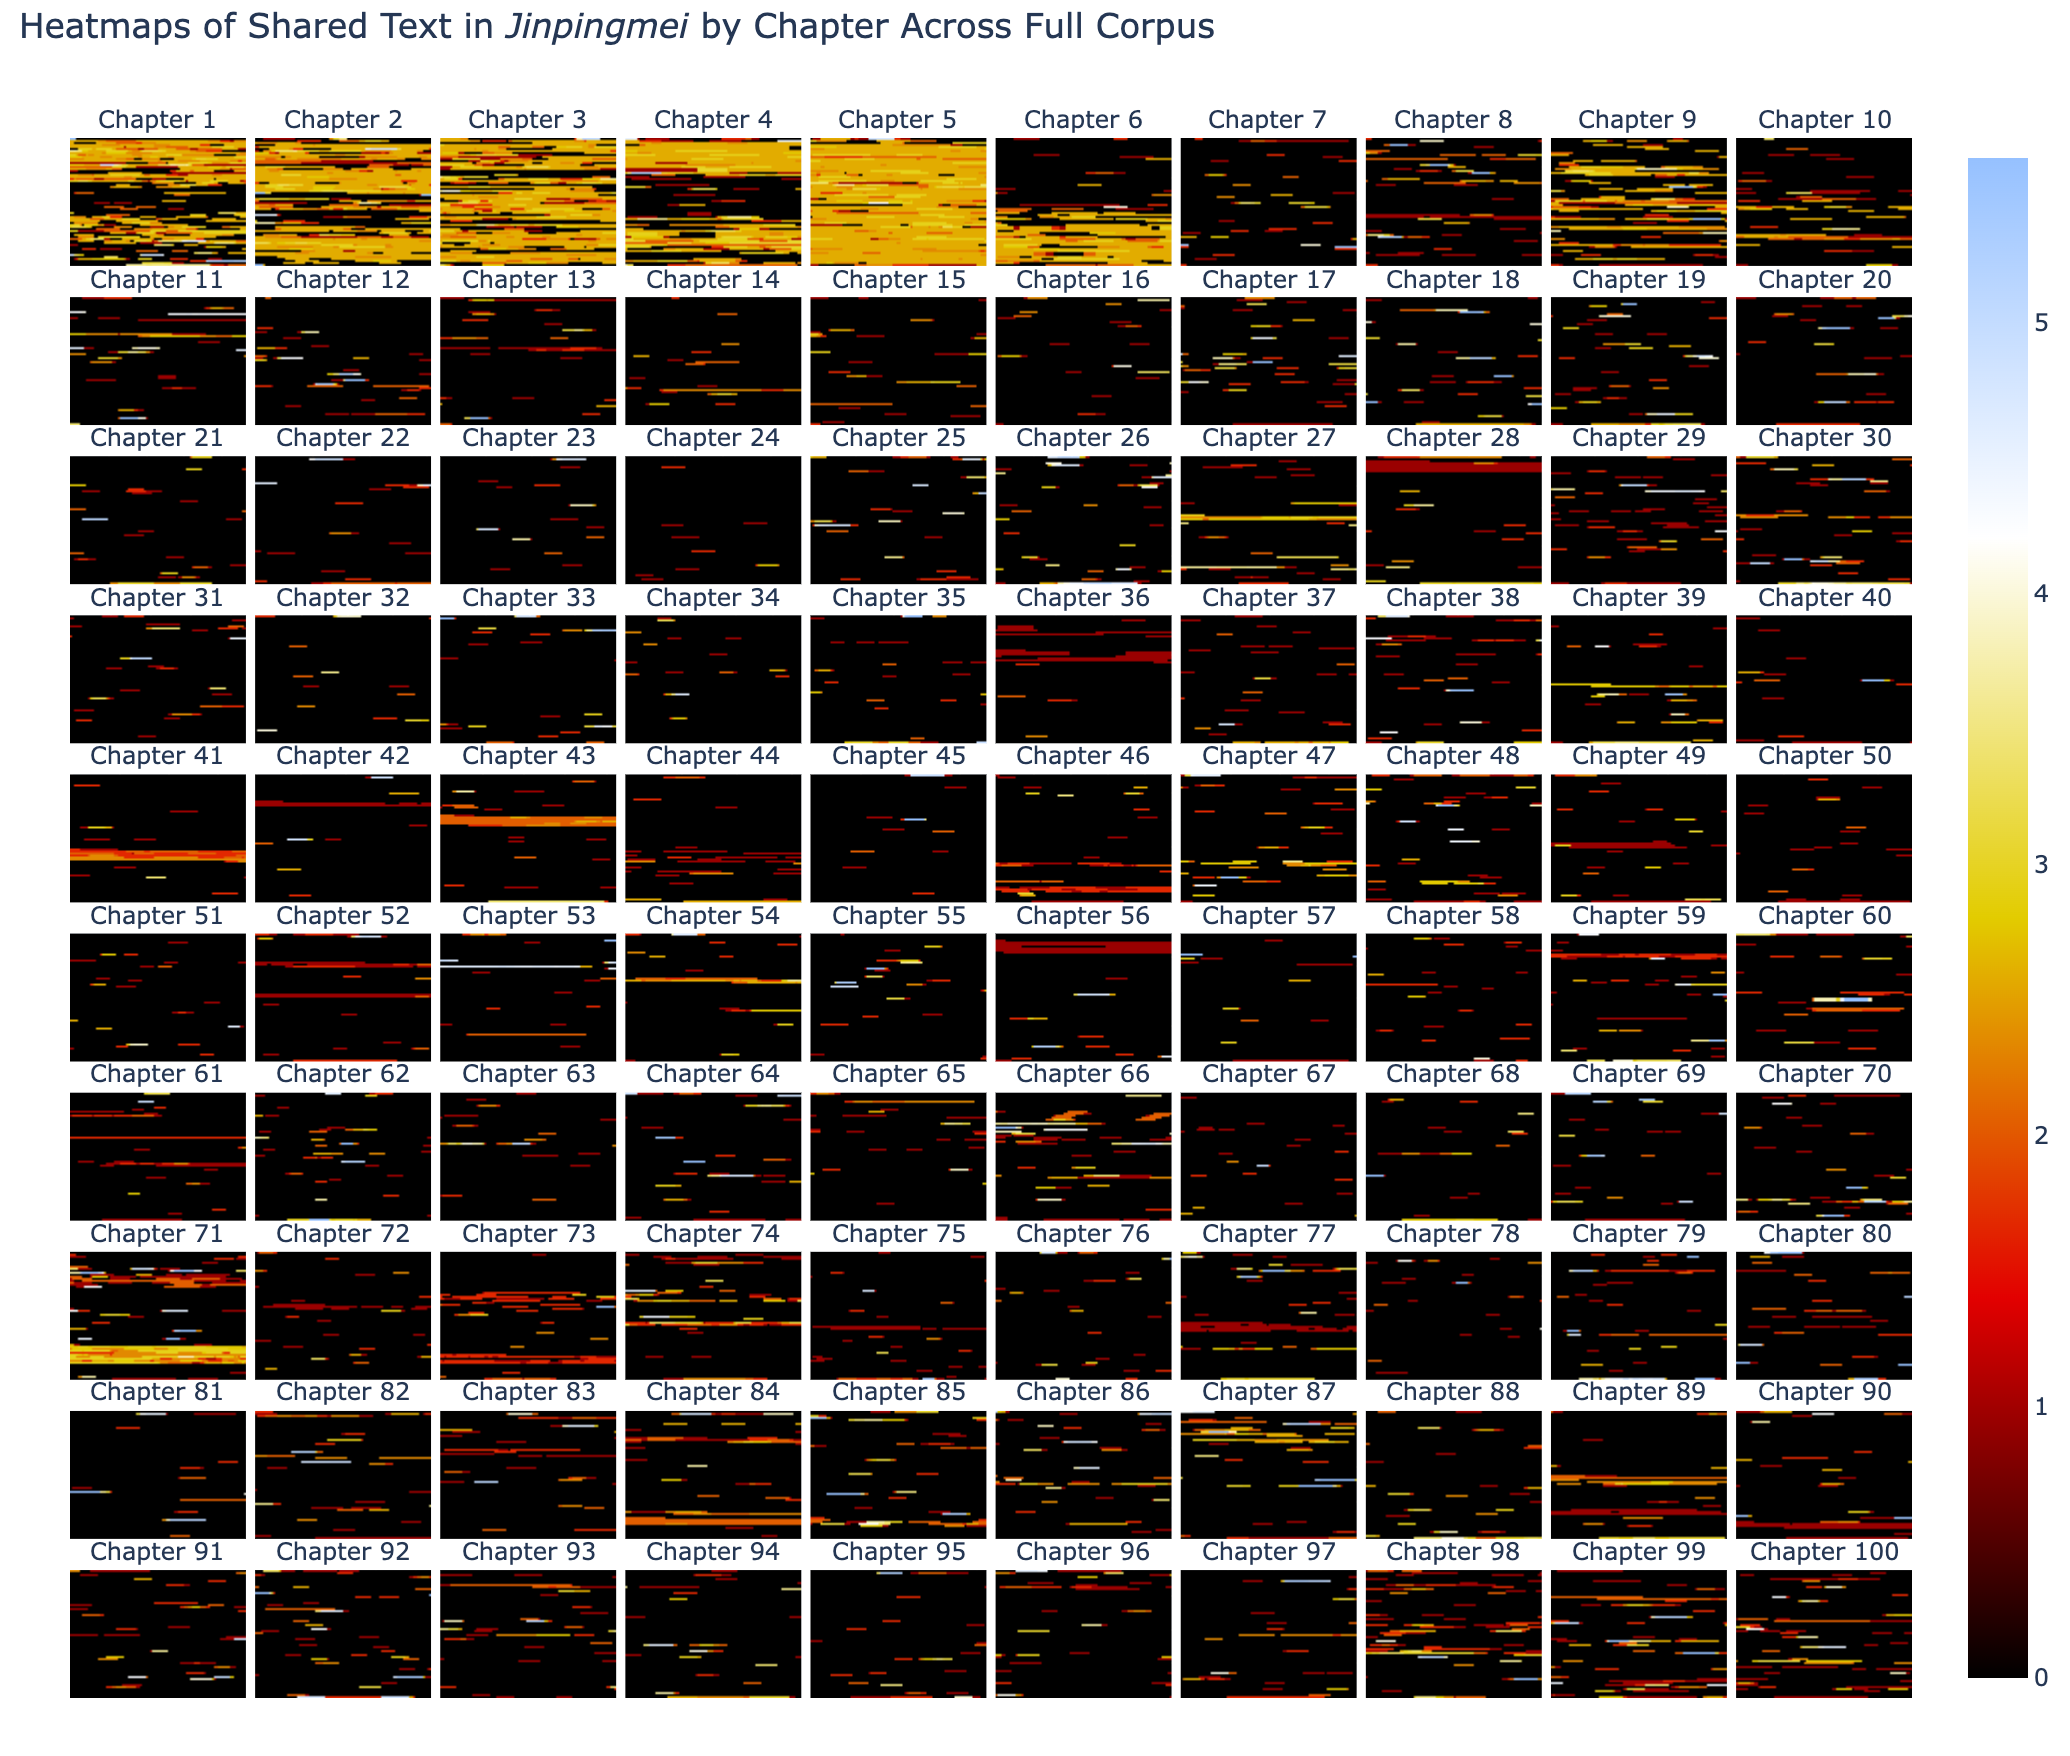

In [19]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Figure 1: Heatmaps of Shared Text in Jinpingmei by Chapter Across Full Corpus.",
                "Shows total number of other texts a given substring appears in. For visual clarity limited to 100 and then the log of the value + 1 is taken."
            ]

        }
    }
}

display(Image("media/heatmapsfull.png", width=1000), metadata=metadata)

# code to generate figures 1 to 3 can be found in the script folder

The above heatmaps illustrate the total number of other texts in the corpus a given substring appears in. For visual clarity I am showing the logarithm of the raw results, because the most common phrases appear so often as to render the rarer results invisible. Substrings in blue appear in 100 or more other texts, substrings in black do not appear elsewhere in the corpus, and substrings in orange appear in 10 to 20 other works. Clearly, the vast majority of intertextuality within the novel appears in the first six chapters of _Jinpingmei_, but many more cases are spread across the entire piece. In order to focus on works that influence the novel’s contents, however, it is necessary to separate out these materials according to date. An exeedingly large number of the intertextual moments evident in this figure are from later works quoting either _Jinpingmei_ or shared earlier materials. As such, most of the results originating from earlier or contemporary works are obscured. Figure 2 shows only materials that I can definitively source to works that predate _Jinpingmei_, which gives a clearer sense of the distribution of earlier material.

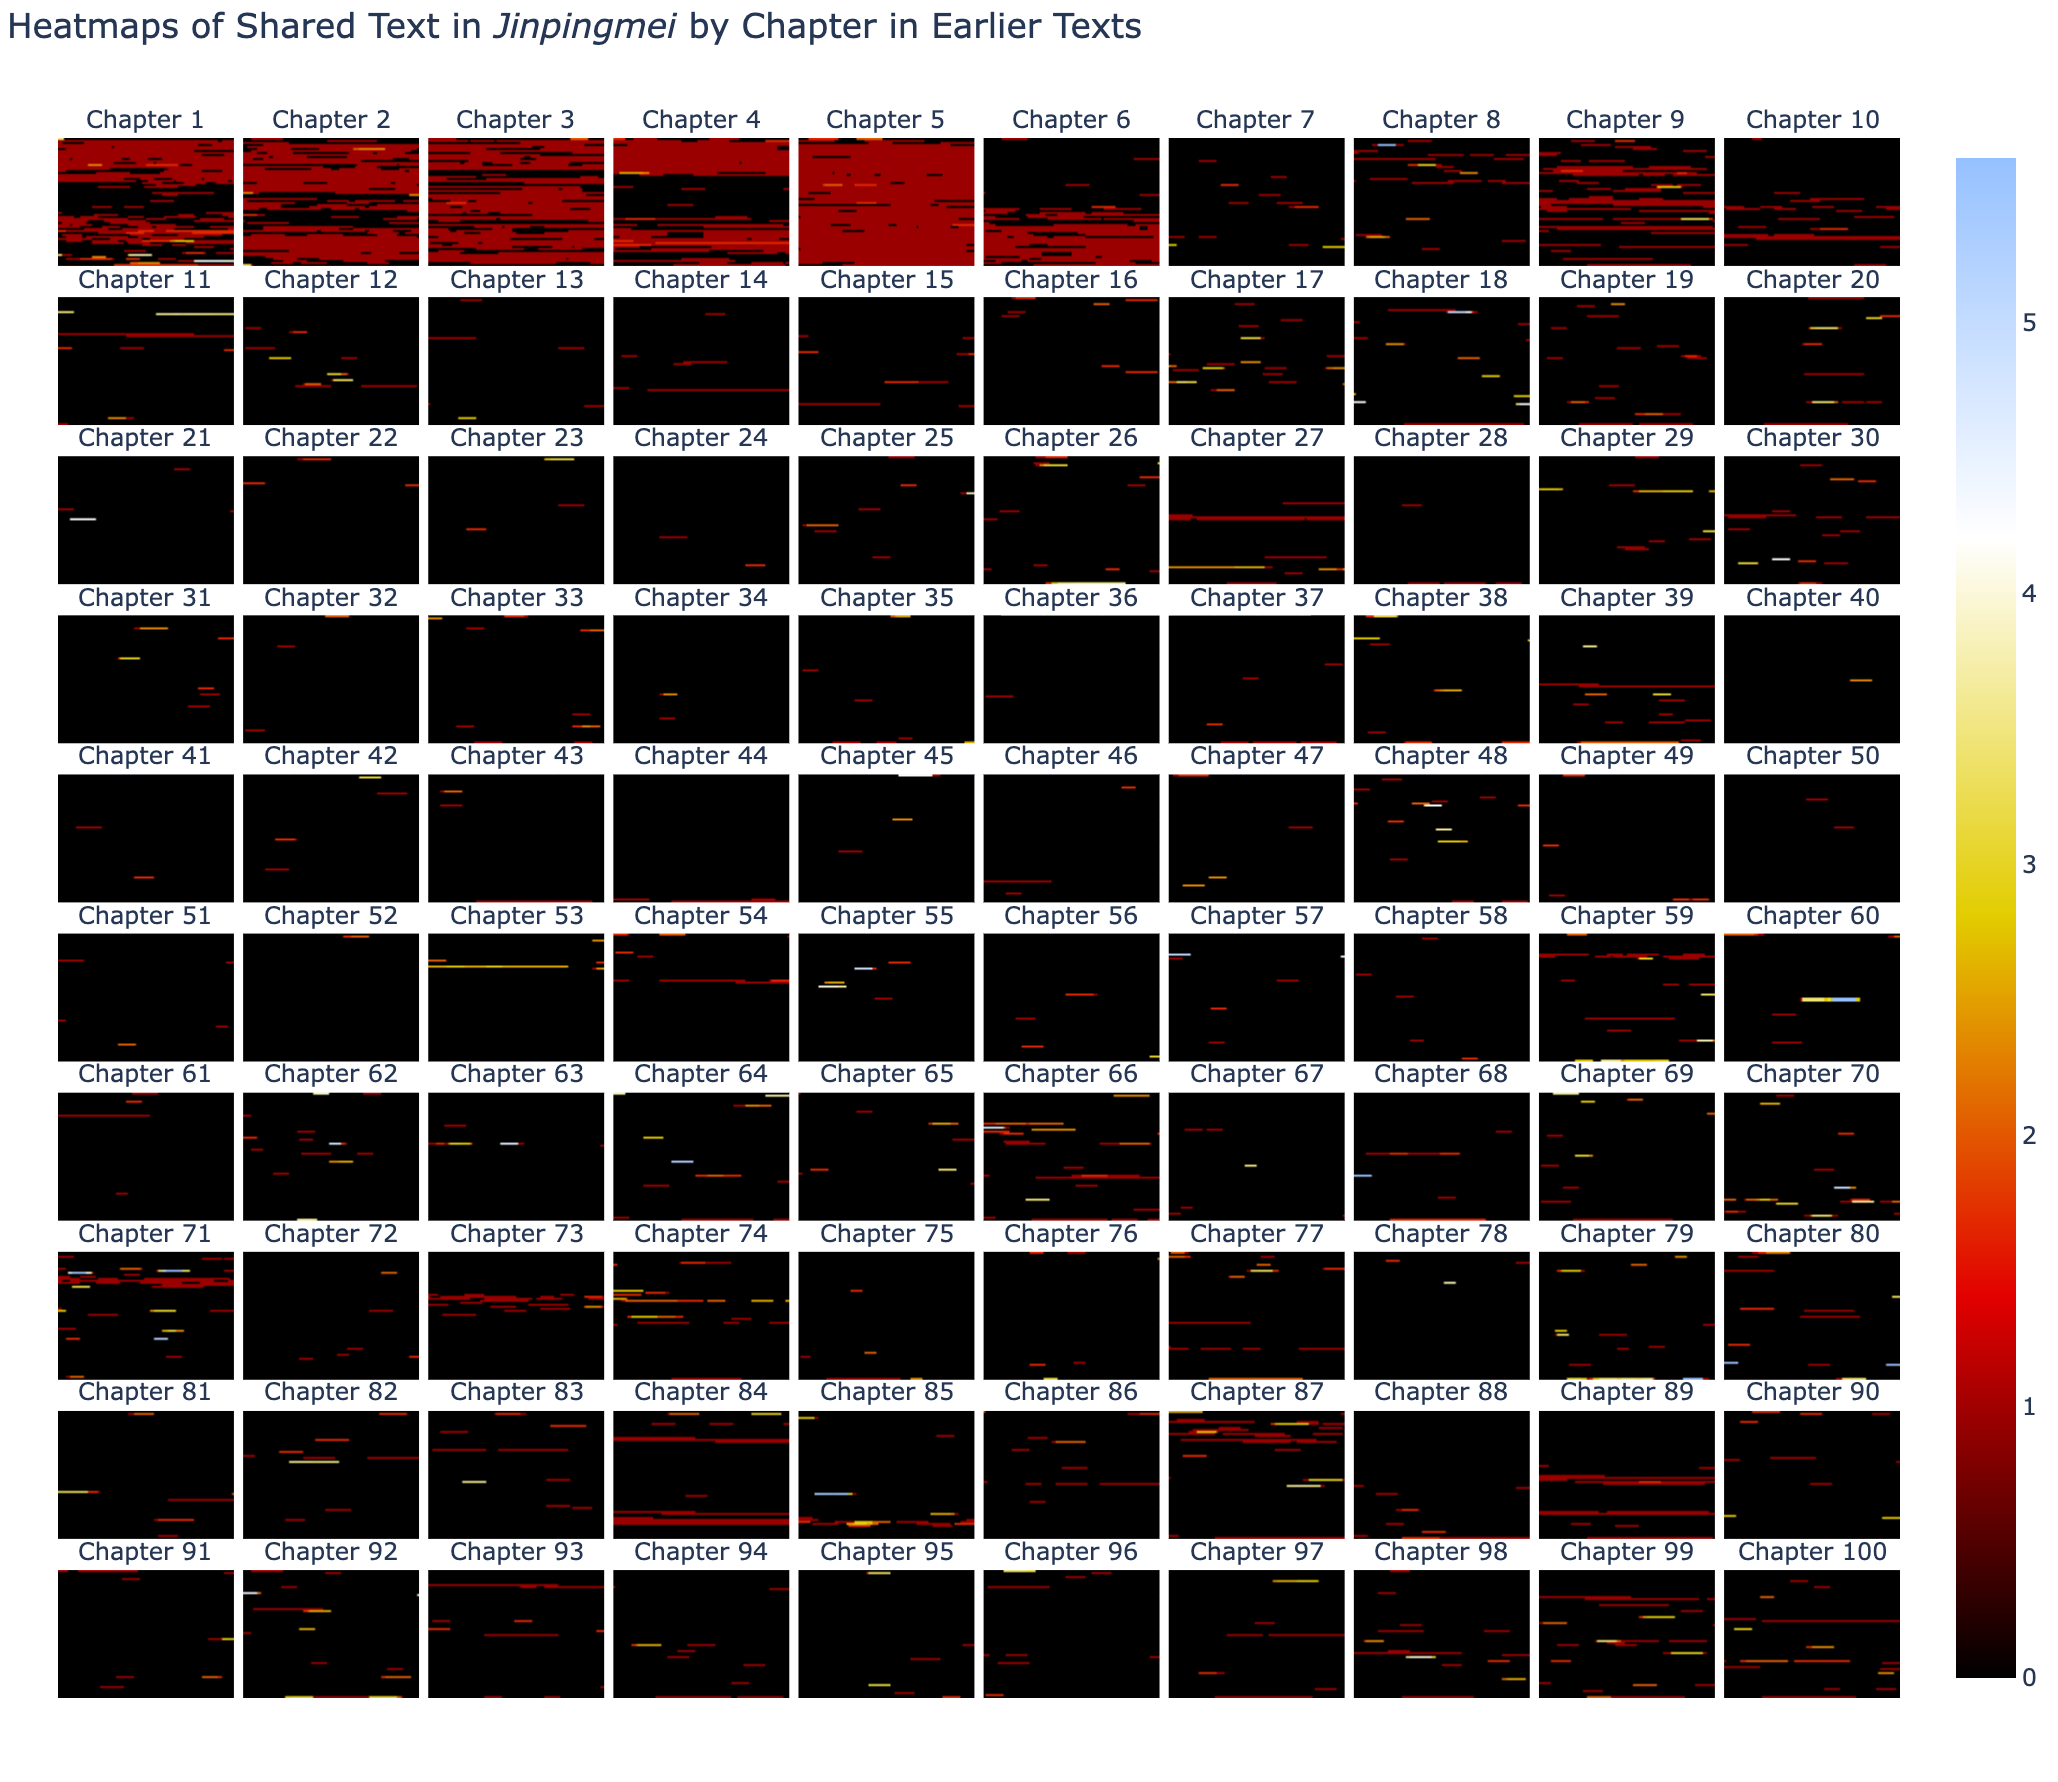

In [21]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 2: Heatmaps of Shared Text in Jinpingmei by Chapter in Earlier Texts"
            ]

        }
    }
}

display(Image("media/heatmapsearlier.png", width=1000), metadata=metadata)

The earliest part of the novel is still the densest site of intertextuality given the extensive reliance on the _Water Margin_, but there are sections throughout that show significant overlap with earlier material. Chapter 9 in particular is extensively connected with earlier materials. The materials represented in Figure 2 are unequivocally references made within _Jinpingmei_ to earlier works.

There are many sections of text whose origins I cannot account for so simply. The numerous sections within the novel that come from roughly contemporary works, and which are difficult to automatically establish as possible source materials, are shown in Figure 3 (I refer to any quotation as "unknown" in the figures throughout this article whenever I do not have external evidence for the direction of quotation).

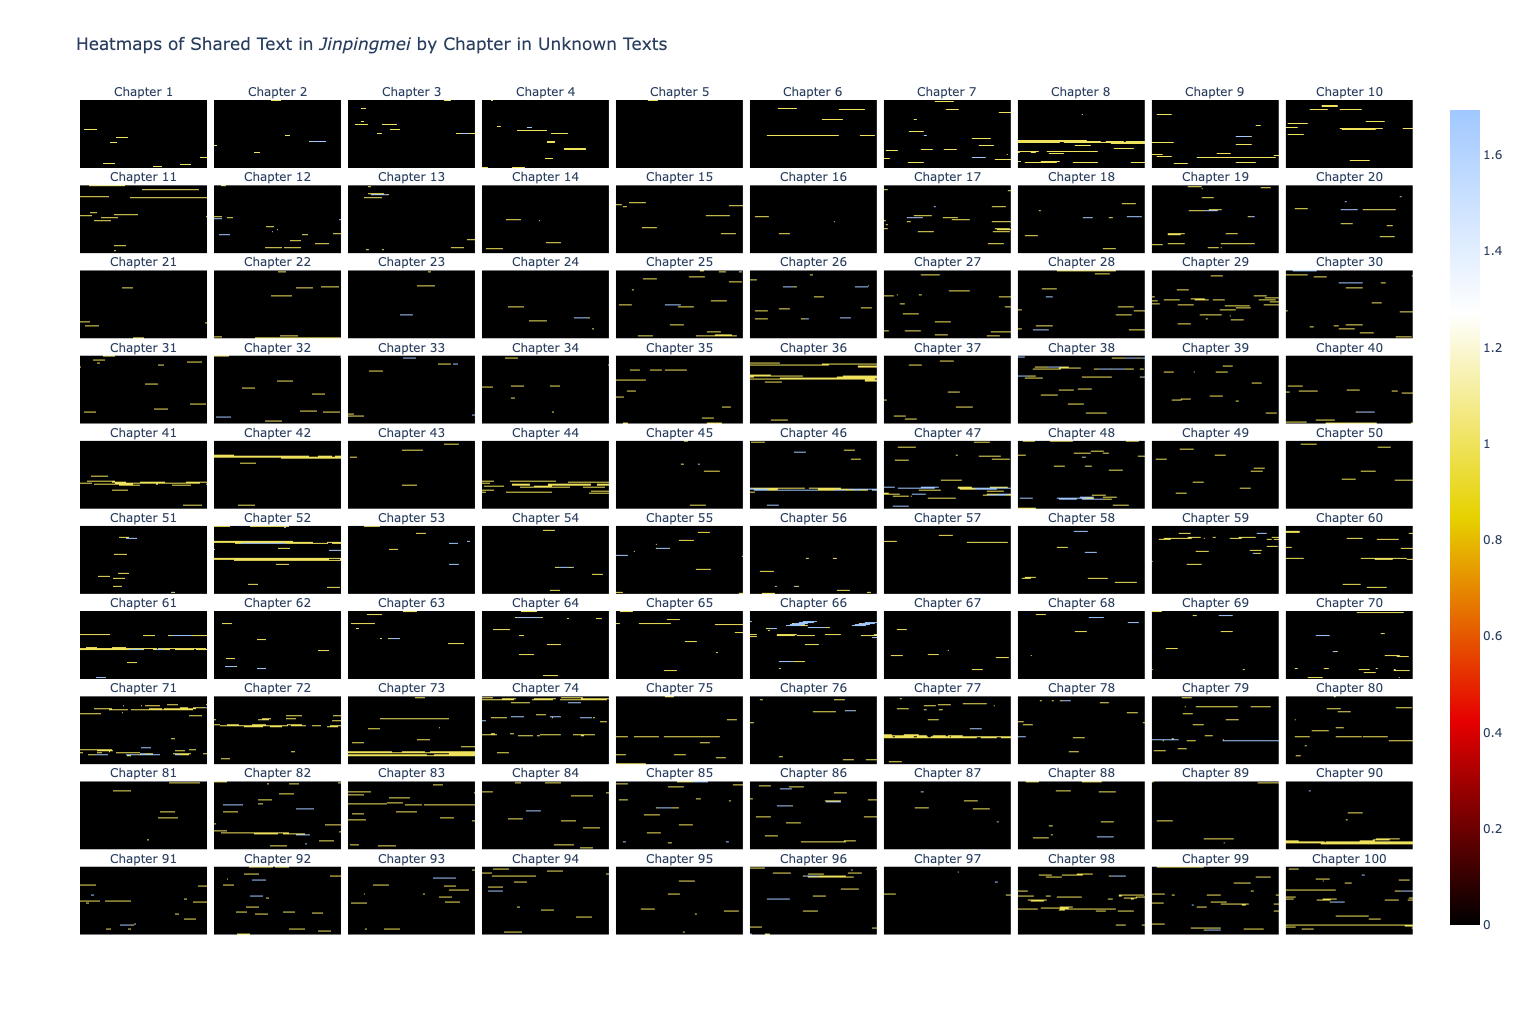

In [23]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 3: Heatmaps of Shared Text in Jinpingmei by Chapter in Unknown Texts"
            ]

        }
    }
}

display(Image("media/heatmapsunknown.png", width=1000), metadata=metadata)

References that can only be sourced to contemporary/unknown materials are abundant but more intermittent than those from earlier texts and computational analysis represents fascinating possibilities for understanding their likely origins. This lower incidence of reference likely derives from the very high rate of refence to known earlier works like the _Water Margin_, which dominate the intertextual space.

## Deriving the origin of source material

The first step I take in identifying the likely origin of source material in _Jinpingmei_ is to filter the intertextual results into several categories. As a preliminary step, I remove the “structural” matches. These are matches like “to see what happens next read the next chapter” that derive from the generic nature of the work rather than its unique style. While these do constitute reuse, these matches do not tell us much beyond the fact that _Jinpingmei_ is a novel that follows usual conventions. I can easily identify this structural material simply by looking for extreme spikes in intertexuality falling around chapter borders.

I then filter the texts by known date of composition, removing materials that were written after _Jinpingmei_ began circulating in the late 16th century/early 17th century. I divide the remaining material into two further groups. First is material that predates the novel, which I use to test the machine learning models’ ability to reliably tease out source material. Finally, I have the material that was roughly contemporary with the novel, which form the body of materials that necessitate this kind of investigation because available chronological evidence is not enough to ascertain the potential textual relationship.

## Textual Representation

In order to create text classifiers, I need to transform natural language textual material into a numerical representation so I can process it through a computer program. There are many ways to do this, and there have been extremely rapid developments in natural language processing in recent years that allow for some very sophisticated representations. Transformer-based models have come to dominate this space as of early 2023 when I conducted these experiments. However, my philosophical approach to developing algorithms is to use the simplest methods possible that provide reliable results. As such, I turn to “bag-of-words” representations of texts, or more precisely "bag of n-consecutive characters in a row (also known as _n_-grams)," where n is normally one (<cite id="1vpsv"><a href="#zotero%7C7306679%2FM38FG44C">(Underwood, 2013)</a></cite>). Each text fragment I study is represented as a vector, or list of numbers, whose individual dimensions consist of simple _n_-gram frequencies. I use the _n_-grams that appear most frequently across the entire corpus to represent the works. I use the implementation of the TfidfVectorizor found in the sci-kit learn Python library (<cite id="crjgy"><a href="#zotero%7C7306679%2FI2V6GAHU">(<i>Sklearn.Feature_extraction.Text.TfidfVectorizer</i>, n.d.)</a></cite>). This takes care of the vectorization for me while also normalizing the vectors in a way that facilitates the process of training machine learning models. This transforms the textual differences among documents into spatial differences that a variety of algorithms can easily measure and compare.

Once texts have been vectorized, I can use them to train text-classification algorithms to predict the likely point of origin of a particular quote. There are multiple criticisms that rightly emerge from such an approach. Fundamentally, simply looking at _n_-gram frequencies disregards syntactic information and elides the complex nature of words in Chinese. Yet for the downstream task of developing models to identify a quote’s likely textual origin, I will show that such a basic representation performs well.

## Building the text classifiers

The approach I take to predicting the likely source of a quote, which I will refer to as a "substring” here—a subsection of the string that is the text of the whole document—rests on the intuition that the quote substring that represents a given instance of intertextuality is going to be more stylistically similar to the text it originally came from than the text that appropriates it. As such, to train my models I randomly extract an equal number of substrings from each document while ensuring that I do not include any intertextual material. I do this to ensure that I do not train the models on the shared quotes that are the subject of my investigation. Because the quotes I am comparing are generally between 10 and 250 or so characters long, I ensure that the substrings I randomly extract fall at some random length between these two extremes. Of course, the actual intertextual results do contain some quotations that are notably longer than this, but limiting training to 250-character segments does not appear to affect the accuracy of the algorithm.

In [31]:
# For easy changes for anyone who would like to reproduce my work, I set the analysis parameters here:

# Please note that the code that actually produces the figures has been commented out

# number of sections to use when training models
n_sections = 5000

# length range of sections
length_range = (10, 250)

# number of features to analyse
max_features = 100

# use idf
use_idf = False

# ngram range
ngram_range = (1, 1)

# verbose will print out certain results across the notebook
verbose = False

In [32]:
import random

# set a random seed so the results of running the code are determinative. feel free to change this
# to see how the performance of the models varies
random_seed = 790183
random.seed(random_seed)

def get_random_sections(text, n_random_sections, random_length_range):
    """
    function to extract n random sections text of a random length from an text.

    First I iteratively create a list of sequences n length chosen at random between two numbers
    until I've chosen ranges that cover the entire length of the text. Then I randomly sample these
    sections and return the associated text.
    """

    # select a starting section
    sections = [[0,random.randint(*random_length_range)]]

    # As long as the end of the last section is less than the length of the text, keep generated
    # sections of random length
    text_length = len(text)    
    while sections[-1][1] < text_length:
        start_point = sections[-1][1]
        end_point = start_point + random.randint(*random_length_range)

        if end_point > text_length:
            end_point = text_length
        sections.append([start_point, end_point])

    # if the last section of text is less than the minimum random length then dispose of it
    if sections[-1][1] - sections[-1][0] < random_length_range[0]:
        sections = sections[:-1]

    # select a total of n random sections form the list
    if n_random_sections < len(sections):
        sections = random.sample(sections, n_random_sections)

    # return the corresponding text selections
    return [text[section_range[0]:section_range[1]] for section_range in sections]


def get_alignment_data(alignment_file):
    '''
    helper function to load in alignment data returned as a nested list

    The alignment file contains 8 columns of data.

    t1_id: The first text (for jpm_alignment.tsv this is always 25272, the JPM corpus id)
    t2_id: The second text
    quote_length: length of shared material
    quote_similarity: percent similarity
    t1_start_index: starting index of the quote within the first text
    t2_start_index: starting index of the quote within the second text
    t1_quote: The quote as it appears in the first text
    t2_quote: the quote as it appears in the second text
    '''

    with open(f'data/alignments/{alignment_file}','r',encoding='utf8') as rf:
        intertext_data = rf.read().split("\n")
        # remove the header line
        intertext_data = intertext_data[1:]
    return [d.split("\t") for d in intertext_data]

def get_document(filename):
    '''
    helper function to load document
    '''
    with open(f'data/corpus/{filename}.txt', 'r', encoding='utf8') as rf:
        return rf.read()

def get_text_and_labels(input_file_ids, input_file_labels,
                        intertext_data, n_random_sections,
                        random_length_range, balance_samples=True):
    '''
    function to extract texts and labels from two files, using alignment data to block out
    sections shared between the two works
    '''

    # limit intertext data to the current docs
    intertext_data = [d for d in intertext_data if d[0] in input_file_ids and d[1] in input_file_ids]



    texts = []
    labels = []

    # iterate through the files
    for file_id, file_label in zip(input_file_ids, input_file_labels):
        # fetch text
        text = get_document(file_id)



        # check the doc id for intertext info
        if file_id == intertext_data[0][0]:
            quote_loc = 4
        else:
            quote_loc = 5

        # get the blocked quote locations working from back to front
        blocked = sorted([[int(d[quote_loc]), int(d[quote_loc]) + len(d[quote_loc+2].replace(" ", ""))]
                          for d in intertext_data],reverse=True)
        # remove shared text from document
        for block in blocked:
            text = text[:block[0]] + text[block[1]:]

        # get random sections for building model
        text_sections = get_random_sections(text, n_random_sections, random_length_range)
        section_labels = [file_label for _ in text_sections]
        texts.extend(text_sections)
        labels.extend(section_labels)

    # to ensure the two works are equally represented, I make sure that no one text dominates the
    # training set
    if balance_samples:
        all_counts = [labels.count(l) for l in input_file_labels]
        if min(all_counts) < n_random_sections:
            for l in input_file_labels:
                while labels.count(l) > min(all_counts):
                    eject = labels.index(l)
                    texts.pop(eject)
                    labels.pop(eject)

    return texts, labels

In [33]:
'''
Run the process on the Jingshi yinyang meng and the Yujing xintan
'''
# Jingshi yinyang meng
jingshi_id = "9785"
jingshi_label = "Jingshi"

# Yujing xintan
yujing_id = "18077"
yujing_label = "Yujing"

# get intertext data
yjjs_intertext_data = get_alignment_data("yujingjingshi.tsv")

# Load and then randomly divide the two texts
yjjs_sections, yjjs_labels = get_text_and_labels([jingshi_id, yujing_id],
                                                 [jingshi_label, yujing_label],
                                                 yjjs_intertext_data,
                                                 n_sections, length_range)

if verbose:
    # print information:
    print("sections from Jingshi")
    print(yjjs_sections[:2], yjjs_labels[:2])
    print("sections from Yujing")
    print(yjjs_sections[-2:], yjjs_labels[-2:])

I then transform these substrings into vectors by calculating their vectorized representation based on _n_-gram frequency.

In [35]:
# uncomment the next line to install sklearn if not installed
# %pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_texts(texts, **kwargs):
    '''
    function that sets up and fits a vectorizer then transforms the input corpus

    kwargs passes the vectorizor options from the outer function to the tfidf vectorizer
    '''

    # initialize vectorizer
    vectorizer = TfidfVectorizer(analyzer="word", token_pattern=".", **kwargs)

    # fit and transform the data
    frequency_vectors = vectorizer.fit_transform(texts)

    # return both vectorizer and vectors
    return vectorizer, frequency_vectors.toarray()

In [36]:
'''
Run the vectorization process
'''
yjjs_vectorizer, yjjs_vectors = vectorize_texts(yjjs_sections,
                                                max_features=max_features,
                                                use_idf=use_idf,
                                                ngram_range=ngram_range)

# if the notebook is set to run in verbose mode then this will print out the first of the vectors.
if verbose:
    print(yjjs_vectors[:1])

I use the resulting vectors to train and test a text classifier according to standard machine learning protocols, following the procedure as outlined on the scikit learn website (<cite id="wo8u3"><a href="#zotero%7C7306679%2FSWBKE8AB">(<i>Cross-Validation: Evaluating Estimator Performance</i>, n.d.)</a></cite>). Once I am confident that the model performs well at determining the origin of the randomly selected substrings, and ensure that the model is not overfit, I apply the model to actual intertextual material to determine the most likely source text.

There are many types of models useful for building text-classifiers. Support vector machines (SVM) are popular for text classification tasks, so I train SVM classifiers with stochastic gradient descent in my experiments here (via the SGDClassifier class (<cite id="02ese"><a href="#zotero%7C7306679%2F5RMNF759">(<i>Sklearn.Linear_model.SGDClassifier</i>, n.d.)</a></cite>)). I could spend significant time trying to identify the absolute best algorithm to use for this, but SVMs prove effective and are very efficient to train and use. Pushing accuracy to the limits, while a very valid pursuit, is outside the scope of this particular article.

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import Markdown
import time


def train_and_test_model(frequency_vectors, labels, test_size=0.25, return_scores=False, print_results=True):
    '''
    function that takes vectors and labels as input data, runs cross validation, trains a final model
    and returns the classifier

    note that I am training the classifiers many times for the sake of these experiments. This would
    not necessarily be necessary when deploying this in the course of exploratory research
    '''

    # split data into training and testing sections following sklearn conventions
    X_train, X_test, y_train, y_test = train_test_split(frequency_vectors, labels, test_size=0.25)

    # set up classifier
    clf = SGDClassifier(loss="hinge",max_iter=50000, random_state=random_seed)

    # perform n fold cross validation on the training set and print results
    scores = cross_val_score(clf, X_train, y_train, cv=5)

    # retrain classifier for confusion matrix
    clf = SGDClassifier(loss="hinge",max_iter=50000, random_state=random_seed)
    clf.fit(X_train, y_train)

    # predict on test data
    y_pred = clf.predict(X_test)

    unique_labels = list(set(labels))

    if print_results:
        display(Markdown(f"Cross Validation scores: {scores.mean():.2f} accuracy with a standard deviation of {scores.std():.2f}"))

        # print confusion matrix and accuracy scores
        res = confusion_matrix(y_test, y_pred)

        md_string = "Confusion Matrix|Actual _"
        md_string += "_|Actual _".join(unique_labels)
        md_string += "_\n"
        md_string += "|".join(["---" for _ in range(len(unique_labels)+1)])
        md_string += "\nPredicted "
        for i, r in enumerate(res):
            r = [str(item) for item in r]
            md_string += unique_labels[i] + "|"
            md_string += "|".join(list(r))
            if i < len(res) - 1:
                md_string += "\nPredicted "

        # print(res)
        # md_string = f"Confusion Matrix|Actual _{unique_labels[0]}_|Actual _{unique_labels[1]}_\n---|---|---\nPredicted {unique_labels[0]}|{res[0][0]}|{res[0][1]}\nPredicted {unique_labels[1]}|{res[1][0]}|{res[1][1]}"
        display(Markdown(md_string))


    # retrain classifier on full training data for best performance
    clf = SGDClassifier(loss="hinge",max_iter=50000,random_state=random_seed)
    clf.fit(frequency_vectors, labels)



    if return_scores:
        return clf, scores

    return clf

In [39]:
# Train and test classifer
yjjs_clf = train_and_test_model(yjjs_vectors, yjjs_labels, print_results=verbose)

## A proof of concept

In order to assess the potential of this process, I start with a very unambiguous case of intertextuality that is clearer than most cases found within _Jinpingmei_. Two works from 1628, the _Yujing xintan_ (A New Discussion of the Jade Mirror 玉鏡新譚) and the _Jingshi yinyang meng_ (A Dream of Light and Dark to Admonish the World 警示陰陽夢) offer a good starting point. These two pieces both discuss Wei Zhongxian 魏忠賢 (1568--1627), the infamous eunuch who acquired significant political power during the Tianqi Emperor’s reign (1620--1627). The _Yujing xintan_ is an unofficial history and the earliest extant work to discuss Wei Zhongxian after his death. The _Jingshi yinyangmeng_ appeared a few months after the _Yujing xintan_ and is essentially a novelization of the earlier history. Given the very clear textual connection between these two works, and their relatively distinct styles, the case offers a nice proof of concept. This distinct style is evident when I use principal component analysis (PCA) to visualize the variance among randomly selected substrings drawn from these two works, as shown in Figure 4.

Note: For a detailed engagement with the usefulness of principal component analysis for understanding Chinese stylistics, see (<cite id="0kiig"><a href="#zotero%7C7306679%2FKZER2VQN">(Vierthaler, 2016)</a></cite>).

In [42]:
# uncomment the next line if pandas or plotly are not installed
# %pip install pandas plotly

from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from plotly import offline
import plotly as py

def generate_PCA_viz(frequency_vectors, labels, vectorizer, title):
    '''
    function that takes frequency vectors and a vectorizer object and generates a principal component
    analysis visualization.
    '''

    pca = PCA(n_components=2)
    my_pca = pca.fit_transform(frequency_vectors)


    pca_df = pd.DataFrame({"pc1":my_pca[:,0], "pc2":my_pca[:,1],"labels":labels})
    fig = px.scatter(pca_df, x="pc1", y="pc2", color="labels", title=title,
                     labels={"pc1":f"PC1 ({pca.explained_variance_[0]*100:.2f}% of variance)",
                             "pc2":f"PC2 ({pca.explained_variance_[1]*100:.2f}% of variance)",
                             "labels":"Text of Origin"})
    vocab = vectorizer.get_feature_names_out()
    loadings = pca.components_
    loadings_df = pd.DataFrame({"vocab":list(vocab), "pc1":loadings[0], "pc2":loadings[1]})

    fig.add_trace(go.Scatter(x=loadings_df["pc1"], y=loadings_df["pc2"], text=loadings_df["vocab"], mode="text", visible="legendonly", name="Loadings"))
    fig.update_layout(width=1000, height=600)
    fig.update_traces(marker={'size': 4})
    fig.show()


In [43]:
# Generate Figure, to see loadings simply click "loadings" in the figure legend
# generate_PCA_viz(yjjs_vectors, yjjs_labels, yjjs_vectorizer,
#                 "PCA showing style of Jingshi yinyangmeng vs. Yujing xintan")

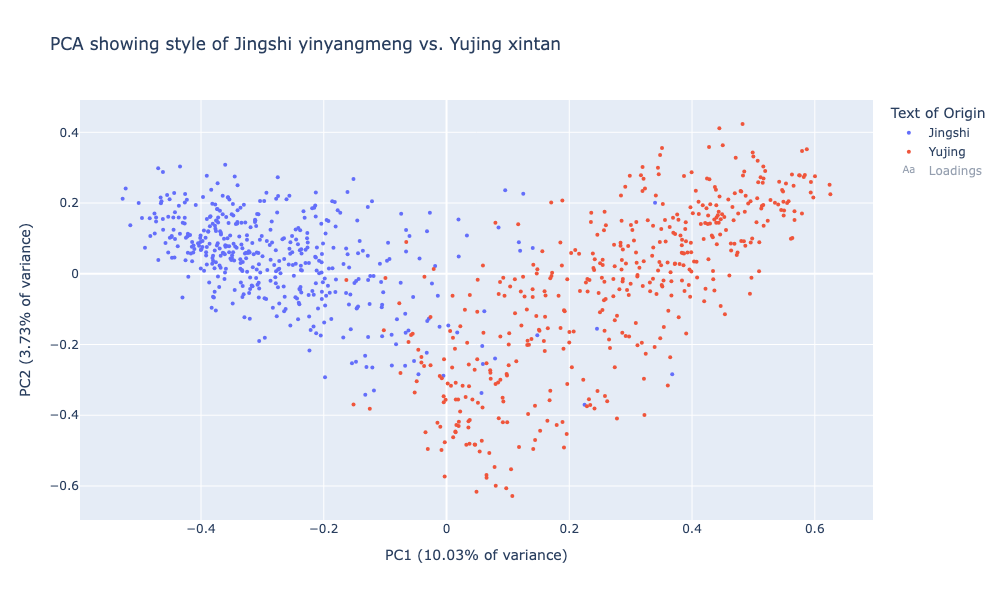

In [44]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "PCA showing style of Jingshi yinyangmeng vs. Yujing xintan"
            ]

        }
    }
}

display(Image("media/pcajingshivsyujing.png", width=1000), metadata=metadata)

There is some overlap in the central part of this figure when sections from each text appear in similar spaces, but overall they are distinct. The component loadings also offer an opportunity to study why texts get pulled in the direction they do. The further a character is from the center of the figure (0,0) the more it “pulls” documents in that direction when it occurs frequently in the document. These first two components only show a combined thirteen percent of the total variance within the dataset. As such, PCA obscures much of the actual differences between these two works. Even so, there is a clear visual distinction between substrings from the two texts.

I use these same vectors, untransformed by PCA, to train a classifier that yields much higher discriminatory power. I begin by dividing the randomly selected substrings into two groups. First, I use 75 percent of the text vectors as a training set for the model and hold out 25 percent of them to test it. Then I use tenfold cross-validation on the training vectors to measure the general accuracy of potential classifiers trained on these materials (in this case, the ten classifiers are 98 percent accurate with a standard deviation of 2 percent). I then train a classifier on all 75 percent of the training vectors and test it against the 25 percent of held-out vectors. This results in a model that is 98 percent accurate, as shown in the confusion matrix below:

 Confusion Matrix|Actual _Yujing_|Actual _Jingshi_
---|---|---
Predicted _Yujing_|122|4
Predicted _Jingshi_|2|122

I then apply this model to the sections of text shared between the _Yujing xintan_ and _Jingshi yinyangmeng_. I know that all the shared text originates in the _Yujing xintan_, so it is simple to assess the model's accuracy. Figure 5 shows that the model accurately traces the origins of the shared quotes to _Yujing xintan_, and the longer the quote is the better the model works.

In [48]:
# Constrain the shortest quotes to ever longer sections and test impact on model's accuracy.


def get_shared_info(file_ids, file_labels, intertext_data, limit=None):
    '''
    This function extracts the quotes from the intertextuality results file
    '''

    shared_info = []
    for file_id, file_label in zip(file_ids, file_labels):
        for d in intertext_data:
            if d[0] in file_ids and d[1] in file_ids:
                quote_location = 6
                if d[1] == file_id:
                    quote_location = 7
                shared_info.append([d[quote_location].replace(" ", ""), file_label])
    if limit:            
        return [s for s in shared_info if len(s[0]) >= limit]
    return shared_info

def run_multiple_models(file_ids,
                        file_labels,
                        vectorizer,
                        classifier,
                        intertext_data,
                        known_source,
                        title,
                        start_limit=8,
                        end_limit=50):
    '''
    Function to test multiple models against varying string lengths
    '''    

    #empty lists to gather info
    limits = []
    accuracy = []
    samples = []
    origins = []

    for limit in range(start_limit, end_limit):
        # extract just the shared info where the quote at least meets the length threshold
        shared_info = get_shared_info(file_ids, file_labels, intertext_data, limit)


        # print(shared_info[0], shared_info[-1])

        for origin in [file_labels[0], file_labels[1], "Overall Performance"]:
            # get shared text by origin
            if origin == "Overall Performance":
                shared_text = [d[0] for d in shared_info]
            else:
                shared_text = [d[0] for d in shared_info if d[1] == origin]

            # get shared vectors
            shared_frequencies = vectorizer.transform(shared_text).toarray()




            # get predictions
            shared_pred = classifier.predict(shared_frequencies)
            # create results dictionary
            results = {file_labels[0]:0, file_labels[1]:0}
            for p in set(shared_pred):
                results[p] = list(shared_pred).count(p)


            if "Jinpingmei" not in results:
                results["Jinpingmei"] = 0
            if known_source:
                correct_res = results[known_source]
            else:
                # if no known source, set 1 to JPM and 0 to other.
                correct_res = results["Jinpingmei"]

            # append results to lists
            limits.append(limit)
            accuracy.append((correct_res/len(shared_pred))*100)
            samples.append(len(shared_pred))    
            origins.append(origin)         

    # create a dataframe for model accuracy
    df = pd.DataFrame({"length":limits, "accuracy":accuracy, "sample_length":samples, "origin":origins})

    # visualize the model's accuracy
    # if known_source set accuracy label
    if known_source:
        accuracy_label = f"Percent selected as {known_source}"
    else:
        accuracy_label = f"Percent selected as {label_1}"

    fig = px.line(df, x="length", y="accuracy", color="origin",
                  labels={
                    "length":"Minimum Length of Quote",
                    "accuracy":accuracy_label,
                    "origin":"Text Quote Appears In",
                    "sample_length":"Total number of quotes analyzed"
                  },
                  hover_data=["sample_length"],
                  title=title)
    fig.update_layout(yaxis_range=[-10,110], width=1000, height=500)
    fig.show()


In [49]:
# specify the known source for model evaluation
yjjs_known_source = "Yujing"

# Generate Figure 5
# run_multiple_models([yujing_id, jingshi_id],
#                     [yujing_label, jingshi_label],
#                     yjjs_vectorizer, yjjs_clf,
#                     yjjs_intertext_data, yjjs_known_source,
#                     "Percent of Yujing predictions by shortest length of tested quote")

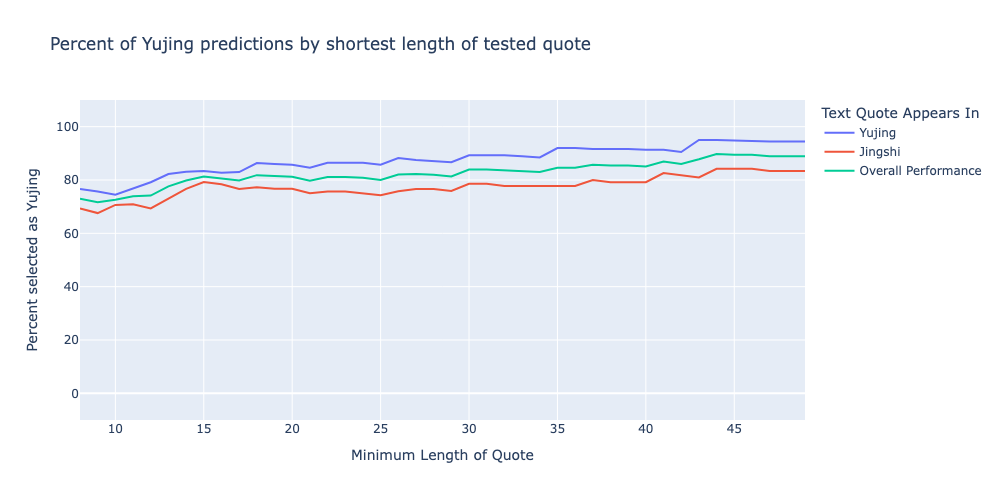

In [50]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Percent of Yujing predictions by shortest length of tested quote"
            ]

        }
    }
}

display(Image("media/yujingpredbylength.png", width=1000), metadata=metadata)

The above figure shows that the accuracy of the model (shown along the y axis) improves as the minimum length of quote analysed increases (as shown on the x-axis). This improvement in accuracy as quotes get longer is unsurprising, given that the short phrases tend not to be what I would consider meaningful sharing. Instead, these tend to be things like dates, which generate multiple instances of detected intertextuality. For example “the sixth day of the eleventh month of the seventh year of the Tianqi reign 天启七年十一月初六日 (December 13, 1627),” appears in various places but the model is not good at associating it with a specific document, nor should we expect it to be, as the phrase in question does not reflect the style of the work.

This figure demonstrates that the models are biased toward the document in which a given quote appears. This is unsurprising, given that the intertextuality algorithm allows up to 20 percent difference between strings, and quotes that an author edited to fit within their own work appear in the results. We would expect the author of the _Jingshi yinyangmeng_ to edit some quotations they take from the _Yujing xintan_ to better fit the style of the _Jingshi_. This editing often has a noticeable impact on model performance. This is also why I run the analysis on a per-quote basis rather than amalgamating all shared text together. I can analyse why certain specific quotes are likely to be judged one way or another to better understand the errors in the model. In the end, the model is still very accurate and convincingly establishes that the shared material originates from the _Yujing xintan_.

## _Jinpingmei_ vs. _Water Margin_

The proof of concept above illustrates that under ideal conditions, it is possible to identify the origins of intertextuality based on apparent textual similarity. The most important intertextual cases within _Jinpingmei_, however, sometimes present us with less ideal circumstances. As I noted earlier in this article, idle readers and scholars alike have noted that _Water Margin_ played an enormously influential role in the development of _Jinpingmei_. As such, the procedure I outlined above for the Wei Zhongxian texts will probably be effective, but the shared generic features of _Jinpingmei_ and _Water Margin_ may complicate matters. These are both novels and do not have the distinct generic features that effectively divide the _Yujing xintan_ from the _Jingshi yinyangmeng_. As Figure 6 shows, when I visualize the stylistic difference among randomly selected document vectors from _Jinpingmei_ and _Water Margin_, there is much more overlap between the two texts. This suggests that their distributions of frequent terms found in these novels are more similar to each other than what is seen in the Wei texts.

In [54]:
# Figure 6 generation
jpm_id = "25272"
jpm_label = "Jinpingmei"

shuihu_id = "25124"
shuihu_label = "Water Margin"

# get intertext data
jpm_intertext_data = get_alignment_data("jpm_alignment.tsv")

# Load and then randomly divide the two texts
jpmsh_sections, jpmsh_labels = get_text_and_labels([jpm_id, shuihu_id],
                                                   [jpm_label, shuihu_label],
                                                   jpm_intertext_data, n_sections,
                                                   length_range)

# Vectorize the texts
jpmsh_vectorizer, jpmsh_frequency_vectors = vectorize_texts(jpmsh_sections,
                                                            max_features=max_features,
                                                            use_idf=use_idf,
                                                            ngram_range=ngram_range)

In [55]:
# Generate figure
# generate_PCA_viz(jpmsh_frequency_vectors, jpmsh_labels, jpmsh_vectorizer,
#                 "PCA showing style of Jinpingmei vs. Water Margin")

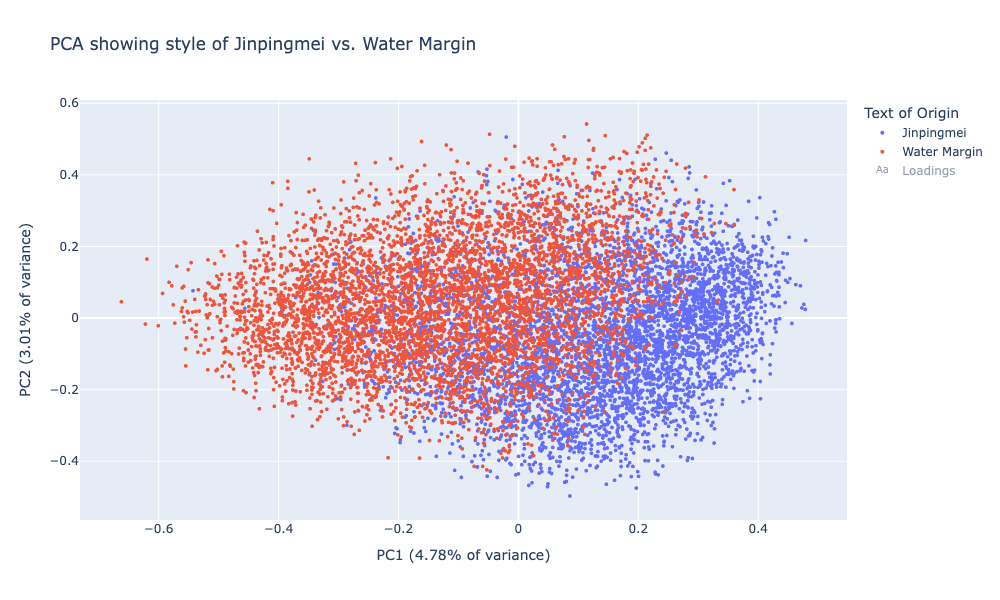

In [56]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "PCA showing style of Jinpingmei vs. Water Margin"
            ]

        }
    }
}

display(Image("media/pcajpmvswatermargin.png", width=1000), metadata=metadata)

Again, significant variance is hidden from view in these types of visualizations. Here the first two principal components only capture the first 4.8 and 3 percent of variance respectively, much lower than the variance I capture in the _Yujing_ vs. _Jingshi_ comparison. But the text classifier does not operate on the principal components and can leverage all of the untransformed data. Somewhat surprisingly, the _Jinpingmei_ vs. _Water Margin_ model’s accuracy is admirably high. Using ten-fold cross validation, the models are 91 percent accurate. The following confusion table illustrates the results of applying the model to the validation set:

Confusion Matrix|Actual _Jinpingmei_|Actual _Water Margin_
---|---|---
Predicted _Jinpingmei_|1127|122
Predicted _Water Margin_|100|1151

Yet despite the excellent performance of the model, its accuracy is much less impressive when applied to the sections of text shared between the two novels. The classifier struggles to stay much above 53 percent accuracy, and the edited sections of text found within _Jinpingmei_ are associated with _Shuihu zhuan_ just over 50 percent of the time. This is only marginally better than a random guess.

In [60]:
# Generate Figure 7
# train and test the model
jpmsh_clf = train_and_test_model(jpmsh_frequency_vectors, jpmsh_labels, test_size=0.25, print_results=False)

# Specify the known source for model evaluation
jpmsh_known_source = "Water Margin"
# run_multiple_models([jpm_id, shuihu_id],
#                     [jpm_label, shuihu_label],
#                     jpmsh_vectorizer, jpmsh_clf,
#                     jpm_intertext_data,
#                     jpmsh_known_source,
#                     "Percent of Water Margin predictions by shortest length of tested quote")

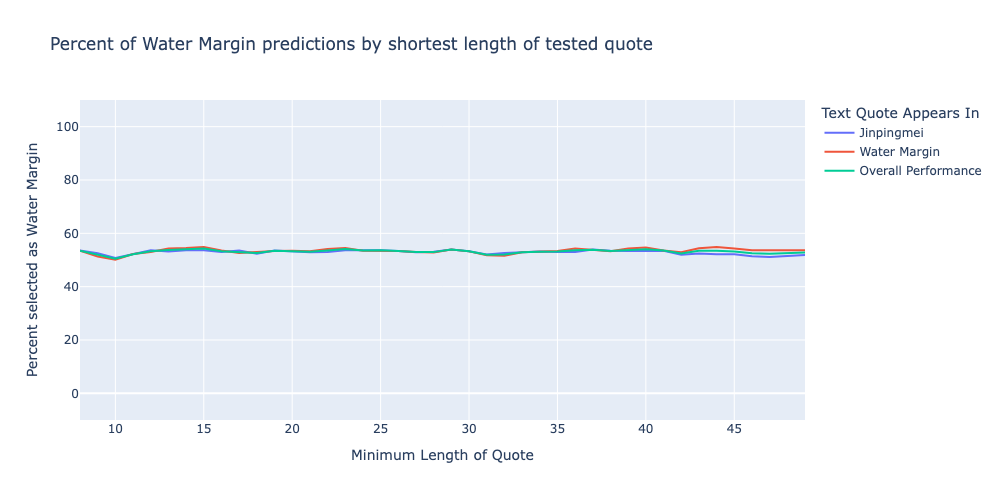

In [61]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Percent of Water Margin predictions by shortest length of quote"
            ]

        }
    }
}

display(Image("media/watermarginpredbylength.png", width=1000), metadata=metadata)

The overall results of the model do point us to _Water Margin_ as the likely progenitor of the shared materials, but the source of inaccuracies in the model is also very instructive. The large amount of error largely stems from the complex relationship between the two texts. First, we can expect some noise simply because the exact version of the _Water Margin_ the author likely used to compose _Jinpingmei_ is not present in the corpus (and does not seem to exist anymore). Additionally, _Jinpingmei_ is a novel centered on several important people who also appear in _Water Margin_. Most prominent is Ximen Qing 西門慶, the anti-hero of _Jinpingmei_. He dominates the narrative for the first 79 chapters of _Jinpingmei_, at which point he dies. Pan Jinlian 潘金蓮, the woman whose wooing occupies the first section of _Jinpingmei_ and whose presence dominates the narrative of the novel as a whole, also appears in _Water Margin_. In _Water Margin_, Wu Song kills Ximen Qing and Pan Jinlian at the offset of their relationship. As such, Ximen and Pan only appear in a few chapters of _Water Margin_. _Jinpingmei’s_ author copies these chapters nearly verbatim but alters the story such that Ximen Qing and Pan Jinlian initially escape Wu’s wrath. They each go on to appear in dozens of chapters. Given this, a randomly selected piece of text from _Water Margin_ is not likely to mention either figure. On the other hand, random text from _Jinpingmei_ is very likely to mention one or both of them. Furthermore, nearly all of their mentions in _Water Margin_ are concentrated in intertextual moments, so the model tends to associate them with _Jinpingmei_. This phenomenon appears in the loadings of the _Jinpingmei_ vs. _Water Margin_ PCA, where the Chinese characters in Ximen Qing, Pan Jinlian, and select other peoples’ names play an important role in distinguishing the two novels.

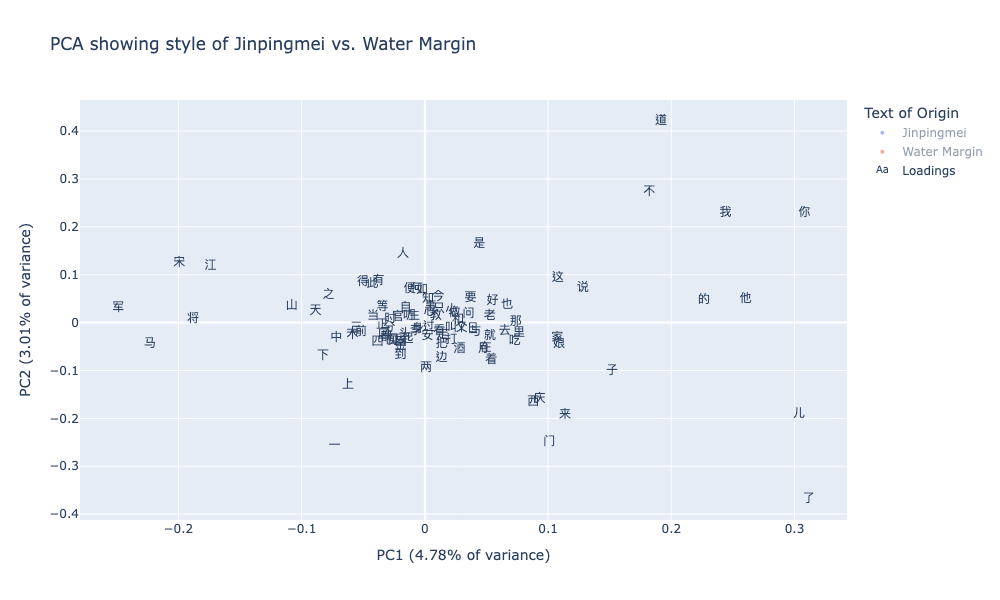

In [63]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Loadings from PCA showing style of Jinpingmei vs. Water Margin"
            ]

        }
    }
}

display(Image("./media/pcajpmvswatermarginloadings.png", width=1000), metadata=metadata)

As such, the model is biased toward evaluating any quote that mentions either of these characters as original to _Jinpingmei_. If I remove the _n_-grams within Ximen Qing and Pan Jinlian’s names from the corpus prior to training, then the accuracy of the model moves well into the 70s, as shown in the figure below. Rather than being detrimental to the efficacy of this approach, it reveals the necessity of understanding exactly what causes these models to decide things in the way that they do.

In [65]:
# Code needed to generate figure 8

# Revectorize the texts
# filter out characters from jpm
jpm_stopwords = ["西", "门", "庆", "潘", "金", "莲", "吴", "月", "娘", "李"]
jpmsh_vectorizer, jpmsh_frequency_vectors = vectorize_texts(jpmsh_sections,
                                                            max_features=max_features,
                                                            use_idf=use_idf,
                                                            ngram_range=ngram_range,
                                                            stop_words=jpm_stopwords)

# Specify the known source for model evaluation
jpmsh_known_source = "Water Margin"
# run_multiple_models([jpm_id, shuihu_id],
#                     [jpm_label, shuihu_label],
#                     jpmsh_vectorizer, jpmsh_clf,
#                     jpm_intertext_data,
#                     jpmsh_known_source,
#                     "Percent of Water Margin predictions by shortest length of tested quote minus stop words")

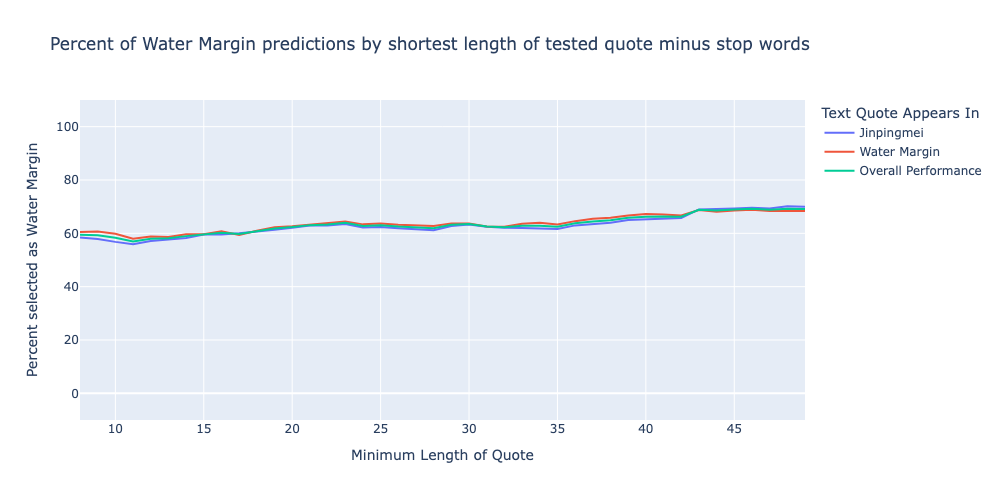

In [66]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Percent of Water Margin predictions by shortest length of quote minus stop words"
            ]

        }
    }
}

display(Image("./media/watermarginpredbylengthnostopwords.png", width=1000), metadata=metadata)

## Jinpingmei vs. Li Kaixian’s Cinüe

Another intriguing example of intertextuality exists between _Jinpingmei_ and Li Kaixian’s work _Cinüe_ (Jesting on Lyrics 詞謔), a piece of dramatic criticism. These two works share a smattering of text throughout _Jinpingmei_, but one scene of particular importance shared between the two occurs in chapter 71 of _Jinpingmei_, in which Ximen Qing and He Xin the Eunuch Director listen to a rather extended song suite (for an English translation see (<cite id="2pkhp"><a href="#zotero%7C7306679%2FGGDJFCUZ">(Roy, 2011)</a></cite>, 309)). Establishing the directionality of quotation is particularly interesting if it turns out the _Cinüe_ is quoting from _Jinpingmei_; this might then serve as evidence that Li Kaixian is a prime candidate for the likely identity of the author of _Jingpingmei_. Some scholars already suspect Li may be the author, but he passed away in 1568, well before there is evidence of _Jinpingmei_ circulating. Beyond its implications for authorship, this would also potentially push the earliest date of composition of the novel back in time substantially.

In [69]:
# Figure 8 generation
cinue_id = "21285"
cinue_label = "Cinue"

# Load and then randomly divide the two texts
jpmcn_sections, jpmcn_labels = get_text_and_labels([jpm_id, cinue_id],
                                               [jpm_label, cinue_label],
                                               jpm_intertext_data, n_sections,length_range)

# Vectorize the texts
jpmcn_vectorizer, jpmcn_frequency_vectors = vectorize_texts(jpmcn_sections,
                                                            max_features=max_features,
                                                            use_idf=use_idf,
                                                            ngram_range=ngram_range,
                                                            stop_words=jpm_stopwords)

# Generate Figure 8
# generate_PCA_viz(jpmcn_frequency_vectors, jpmcn_labels, jpmcn_vectorizer,
#                 "PCA showing style of Jinpingmei vs. Cinue")

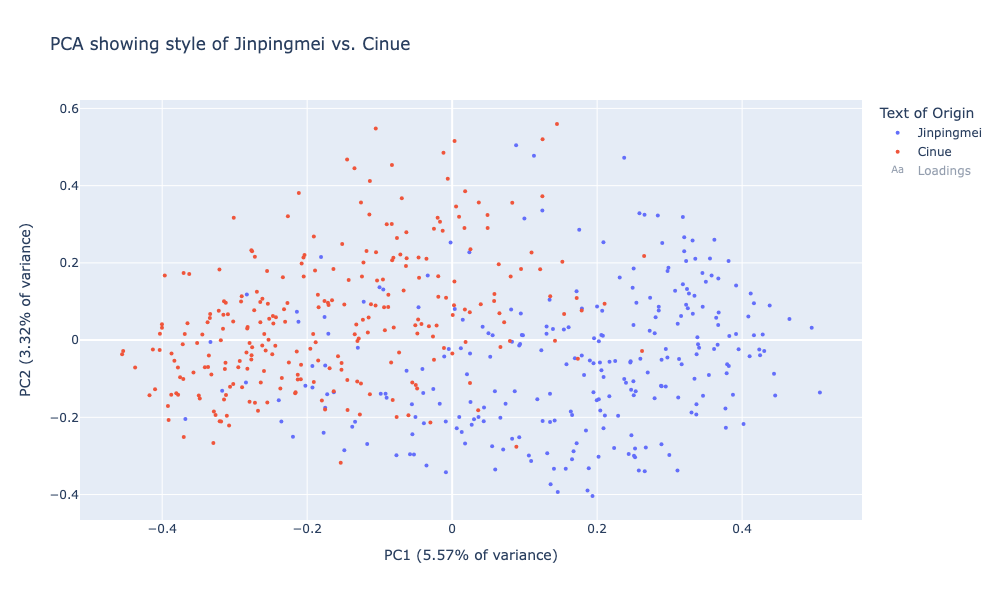

In [70]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "PCA showing style of Jinpingmei vs Cinue"
            ]

        }
    }
}

display(Image("media/pcajpmcn.png", width=1000), metadata=metadata)

This figure shows that the style of _Jinpingmei_ and _Cinüe_ is distinct. There is some amount of stylistic overlap, but not nearly so much as seen between _Jinpingmei_ and _Water Margin_. Here, the algorithm produces a model that is 94 percent accurate with a standard deviation of 3 percent. The fully trained model is 95 percent accurate and results in the following confusion matrix.

 Confusion Matrix|Actual _Jinpingmei_|Actual _Cinüe_
---|---|---
Predicted _Jinpingmei_|133|9
Predicted _Cinüe_|2|106

Following the same process as above I can also train and test a number of models to measure the impact the length of a quote has on model accuracy.

In [74]:
jpmcn_clf = train_and_test_model(jpmcn_frequency_vectors, jpmcn_labels, test_size=0.25, print_results=False)

jpmcn_known_source = "Cinue"
# run_multiple_models([jpm_id, cinue_id],
#                     [jpm_label, cinue_label],
#                     jpmcn_vectorizer, jpmcn_clf,
#                     jpm_intertext_data, jpmcn_known_source,
#                    "Percent of Cinue predictions by shortest length of tested quote")

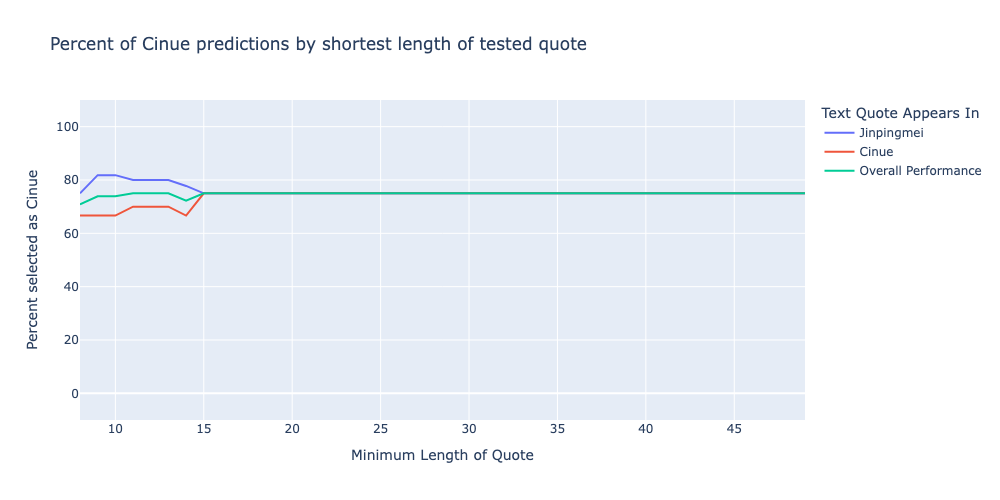

In [75]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Percent of Cinue predictions by shortest length of tested quote"
            ]

        }
    }
}

display(Image("media/cinuepredbylength.png", width=1000), metadata=metadata)

The model consistently predicts that the origin of the shared quotes are from the _Cinüe_ rather than from _Jinpingmei_. This is disappointing in terms of the potential authorship of _Jinpingmei_, because we cannot use this as evidence that Li had a copy of the novel. However, it comports well with the expectations we should have after considering that the _Cinüe_ is a piece of dramatic criticism and upon observing that the intertextuality algorithm reveals even deeper layers of quotation occurring in these sections. There is also the slight complication of genre here: it may be that the algorithm focuses heavily on genre (the _Cinüe_ being full of poetry and drama and _Jinpingmei_ mostly consisting of prose). Given the layered nature of my approach, this doesn’t present too much of an issue in this particular case because I can trace this material further into the past, but it could potentially present roadblocks elsewhere.

## _Jinpingmei_ vs. the World

The final step I will take in evaluating this approach is to build models to compare _Jinpingmei_ in a pair-wise fashion against every earlier text in the corpus. This means that I train an independent model for each comparison  (so _Jinpingmei_ vs. _Shuihu zhuan_, _Jinpingmei_ vs. _Cinüe_, _Jinpingmei_ vs. _Qingpingshantang huaben_ and so on). The main utility of this approach is ease of interpretability and accuracy. Multi-class models become much more difficult to work with as the number of classes increase. I should note that training so many models is somewhat computationally intense, but the method remains relatively scalable. Each pair-wise classifier takes somewhere between .005 seconds and 2 seconds to train inside this notebook environment on a 2024 MacBook Pro. There is significant room for optimization if I need to perform larger-scale analysis.

In doing so, I can assess general performance and highlight drawbacks to this approach. Figure 10 shows how each of these models performs on cases of material known to predate _Jinpingmei_.

In [79]:
import numpy as np

with open('data/jpm_intermeta_s.tsv', 'r', encoding='utf8') as rf:
    jpm_meta = rf.read().split("\n")
jpm_meta = [d.split("\t") for d in jpm_meta]

def one_vs_many_models(file_1, label_1, metadata,
                       intertext_data, n_sections,
                       looking_at, length_limit, plot_title,
                       show_summary=True, print_quotes=None, num_iterations=10):
    '''
    This function trains multiple models comparing one text against the rest of the texts
    that share material with it.

    Reruning this multiple times may offer better insight into the likely origin of quotes
    as the results tend to smooth out significantly.
    '''

    # get the files that are present
    files_in_intertext_data = set([d[1] for d in intertext_data])

    # limit the comparative files to just those pertaining to the looking_at
    # variable (before, for example, limits the texts to works that predate
    # Jinpingmei.
    comparative_files = [[d[0], d[1],d[-1]] for d in metadata if d[-1] in looking_at and d[0] in files_in_intertext_data]

    all_results = {}

    pred_earlier = set()
    pred_jpm = set()
    miss_classed = []

    quote_prediction = {}
    quote_text = {}
    for _ in range(num_iterations):
        for i,comparative_file in enumerate(comparative_files):

            file_2 = comparative_file[0]
            label_2 = comparative_file[1]
            looking_at_state = comparative_file[2]


            # get the shared quotes and the text they originate in
            shared_info = get_shared_info([file_1, file_2],
                                          [label_1,label_2],
                                          intertext_data,
                                          limit=length_limit)

            # if there are no shared quotes (which can occur if nothing meets the length criteria)
            # move to the next iteration
            if len(shared_info) == 0:
                continue



            # get text and labels to train on
            sections, labels = get_text_and_labels([file_1, file_2],
                                                    [label_1, label_2],
                                                    intertext_data, n_sections,
                                                    length_range)


            # limit the training to works that have at least 10 random sections each
            if len(sections) < 20:
                continue


            if file_2 not in all_results:
                all_results[file_2] =  {"title":label_2,
                                "looking_at_state":looking_at_state,
                                "acc":[],
                                "decision":[],
                                "confidence":[]}

            local_results = all_results[file_2]   


            # Vectorize the sections
            vectorizer, frequency_vectors = vectorize_texts(sections,
                                                            max_features=max_features,
                                                            use_idf=use_idf,
                                                            ngram_range=ngram_range,
                                                            stop_words=jpm_stopwords)


            # train and test classifier
            clf,scores = train_and_test_model(frequency_vectors, labels, return_scores=True, print_results=False)

            # filter down to just shared text and then create vectors
            shared_text = [d[0] for d in shared_info]
            shared_frequencies = vectorizer.transform(shared_text)

            # make predictions annd get confidence measures of the decisions
            shared_pred = clf.predict(shared_frequencies)
            confidence_measures = clf.decision_function(shared_frequencies)

            local_results["acc"].extend(scores)
            local_results["decision"].extend(shared_pred)
            local_results["confidence"].extend(confidence_measures)


            # print the results from a text if interested
            if print_quotes and label_2 == print_quotes:
                for p,s,c in zip(shared_pred, shared_text,confidence_measures):
                    print(p,s,c)


    # compile results for display:
    compiled_results = {"id":[], "title":[], "looking_at_state":[], "mean_acc":[],
                        "avg_decision":[], "avg_confidence":[],
                        "num_quotes":[]}

    for doc_id,info_dict in all_results.items():

        # create results dictionary
        results = {label_1:0, info_dict["title"]:0}

        # populate results dictionary
        for p in set(info_dict["decision"]):
            results[p] = info_dict["decision"].count(p)

        decision_proprotion = results[info_dict["title"]]/len(info_dict["decision"])

        compiled_results["id"].append(doc_id)
        compiled_results["title"].append(info_dict["title"])
        compiled_results["looking_at_state"].append(info_dict["looking_at_state"])
        compiled_results["mean_acc"].append(np.array(info_dict["acc"]).mean())
        compiled_results["num_quotes"].append(len(info_dict["confidence"])//num_iterations)
        compiled_results["avg_decision"].append(decision_proprotion)
        compiled_results["avg_confidence"].append(np.array(info_dict["confidence"]).mean())

    df = pd.DataFrame(compiled_results)

    print("total earlier text", len(df[df["avg_decision"] > .5]))
    print("total jpm pred", len(df[df["avg_decision"] < .5]))
    print("total unsure", len(df[df["avg_decision"] == .5]))
    fig = px.scatter(df, x="avg_confidence", y="avg_decision",
                     labels = {"mean_acc":"Accuracy of classifier", "num_quotes":"Number of quotes analyzed",
                              "title":"Title", "avg_decision":f"Average decision of model",
                              "avg_confidence":"Average confidence score"},
                     hover_data=["id", "mean_acc", "title", "num_quotes"],
                     title=plot_title)
    fig.update_layout(width=800,height=400,yaxis_range=[-.1,1.1])
    fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="green")
    fig.add_hline(y=0.5, line_width=1, line_dash="dash", line_color="green")
    fig.show()

    if show_summary:
        fig = px.histogram(df, x="avg_confidence", labels={"count":"Total texts", "avg_confidence":"Average Confidence Score"})
        fig.update_layout(width=800,height=400, yaxis_title="Total texts")
        fig.show()

In [80]:
# Figure 10 generation
# Include only texts that are known to come before Jinpingmei
looking_at = ["before"]
length_limit = 25


# one_vs_many_models(jpm_id, jpm_label, jpm_meta, jpm_intertext_data,
#             n_sections, looking_at, length_limit,
#             "Predicted origin of quotes at least 25-characters long that predate Jinpingmei",
#             show_summary=False)

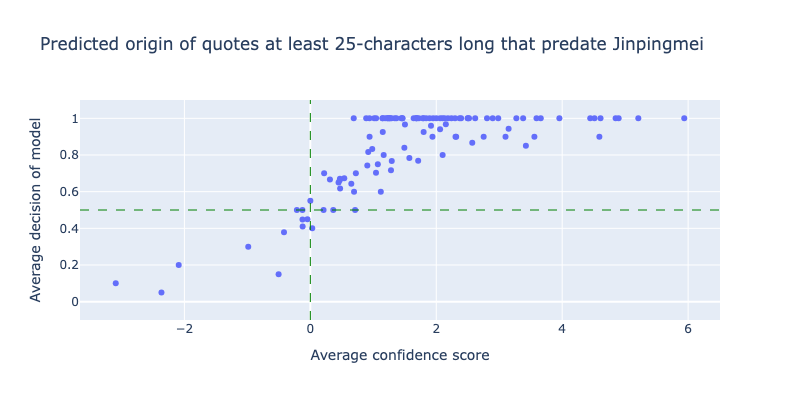

In [81]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "Predicted origin of quotes at least 25-characters long that predate Jinpingmei"
            ]

        }
    }
}

display(Image("media/predoriginpredate.png", width=1000), metadata=metadata)

In the above figure, each dot represents a comparison between all quotes shared between _Jinpingmei_ and an earlier text. The y-axis shows the average decision. 0 indicates that the model predicts that all shared quotes come from _Jinpingmei_ and 1 indicates that all appear to come from the opposing text, and .5 indicates that half the model’s predictions go one way and half go the other. Importantly, this is not to say that in cases where a dot falls at .5 that half the quotes _actually_ come from one text and half from the other. Rather, the model is simply wrong half the time. An alternative explanation may be that in half the cases an author edited the shared quotes enough for the model to judge them as more similar to the quoting text than as their real source. The x-axis shows the average confidence the model has in the decisions it makes. Technically, this is the average of how far all shared quotes are from the boundary the model uses to separate the two classes. Negative numbers indicate the model evaluates a quote as from _Jinpingmei_ and positive numbers indicate that it evaluates the quote to be from the other text. In essence, the models judge works in the lower left likely to be quoting from _Jinpingmei_ and those in the upper right to be quoted by it. The total number of quotes involved in the decision also has an important impact, as the more quotes the models can operate on, the more we can rely on the results. It is far more informative if the model judges 70 percent of 400 shared quotes to be from one text than if it guesses that 100 percent of 2 quotes are from another.

When I amalgamate these results and establish that results above .5 are correct, the models work well and accurately predicts that quotes from 101 of 114 texts are more likely to be the source of the quotes than _Jinpingmei_ where the evaluated quotes are at least 25 characters long. The model incorrectly predicts that ten texts quote _Jinpingmei_, and the results are evenly split for another two texts. This is decent performance but slightly lower than I expected given the performance of the models when I was conducting cross-validation.

Importantly, cases of mistaken origin are not random. Many stem from quotes shared widely across the corpus. Many mistaken quotations occur when a quote is not original to either _Jinpingmei_ or the other text. Fortunately, these will often have a clearer origin elsewhere in the corpus. Genre also causes some issues, as quotations from poetry are among the more difficult to pin down. Among the missed cases include a poem found in a commentary on a Daoist text called the _Taishang laojun shuochang qingjing jingzhu_ (Commentary on the Classic of Everlasting Purity and Tranquility as told by Supreme Lord Lao 太上老君說常清靜經註).

>The beauty of sixteen has a body as smooth as cream, Her loins are a sword with which to slay the unwary. Though no one may see your head fall from your neck, Before you know it, the Marrow of your bones is sapped (<cite id="b3atq"><a href="#zotero%7C7306679%2FGGDJFCUZ">(Roy, 2011)</a></cite>, 640). 二八佳人體似酥, 腰間仗劍斬愚夫; 雖然不見人頭落, 暗裏教君骨髓枯。

The only difference between the two versions is the _Taishang laojun_ version uses _fenming_ ("evident" 分明) instead of _suiran_ ("though" 雖然). In this case, the tone and content of the poem line up clearly with _Jinpingmei_ and less so with the broader context of _Taishang laojun_. Additionally, this poem is found in twenty-eight works in the corpus, including Shuihu zhuan. It can ultimately be traced to the Tang and is found in the Quantangshi (Complete Poems of the Tang Dynasty 全唐詩) under works by Lü Dongbin 呂洞賓 (fl. 9th century).

The models also mistakenly attributes the single quotation from the _Western Chamber_ (_Xixiang ji_ 西廂記) in the results to _Jinpingmei_. This quote appears in the midst of a song suite that is clearly a pastiche of the types of songs present in _Western Chamber_. This is possibly because there are several Chinese characters that appear in characters' names:
>...gold lamé curtains depicting mandarin ducks in the moonlight; And folding jade screens adorned with kingfishers enjoying the breezes of spring. The music of wedding bells, Will be accompanied with phoenix flutes and ivory clappers, Patterned cithara and phoenix pipes (<cite id="a62lu"><a href="#zotero%7C7306679%2FGGDJFCUZ">(Roy, 2011)</a></cite>, 432). 鴛鴦夜月銷金帳，孔雀春風軟玉屏。合歡令,更有那鳳簫象板錦瑟鷥笙。

Despite a few clear misses, there are very few cases where this approach completely fails to identify a plausible earlier text for shared quotes that appear in earlier works, but individual cases still present some issues. The accuracy is interestingly variable when looking at different versions of the _Water Margin_. Most editions tend to sit relatively close to the decision border, with the 100 chapter edition being the most likely to be mistaken for quoting _Jinpingmei_. This may point to valuable directions for future research: some editions may be closer to the one the author originally used, while others may have been produced after _Jinpingmei_ and are in fact being influenced by it (although at this point this remains speculative).

The complex results illustrated in this figure highlight that one cannot treat intertextuality in a naïve fashion and simply assume that the models will be infallible. The model can only tell us, based on the input vectors, which document a string appears most similar to, even when the actual origin of the quote might be represented elsewhere in the corpus. It makes sense to find ways of increasing the fidelity of the results. One option is to train a multi-class model that aims to ascribe each quote to a particular text within the corpus. While an important step to take eventually, this is not necessarily the best first approach. As the number of classes in a model increases, the more complex, and often less reliable, the model becomes.

Instead, a useful first step in trying to trace the ultimate source of quotes within the novel might be to narrow the search space as much as possible before even building any models. One heuristic for dealing with heavily layered text is to follow Hanan’s example by looking for instances of the overlap and identifying the work where the longest matching quotes appear. If four different texts all share the same substrings, but one of them encompasses all the rest, this is likely to be the actual origin of the quote. Thus, it may not even be necessary to compare _Jinpingmei_ against a text if it is clearly not the origin of the material. The quote from the _Qingpingshantang huaben_ that appears at the beginning of this article is a good example. The intertextuality algorithm identifies three texts in which the opening poem appears: the _Qingpingshantang huaben_, the _Quansongci_ (Complete Lyric Poems of the Song Dynasty 全宋詞), and the _Shuofu_ (Purlieus of Exposition 說郛), a translation by Victor Mair via Christopher Atwood<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|7306679/JIV3M8QJ"></i>Hanan, P. (1963). Sources of the Chin P’ing Mei. <i>Asia Major</i>, <i>10</i>(2), 23–67.</div>
  <div class="csl-entry"><i id="zotero|7306679/X6CT5F9A"></i>Roy, D. (1997). <i>The Plum in the Golden Vase</i> (Vol. 1). Princeton University Press.</div>
</div>
<!-- BIBLIOGRAPHY END -->. Yet the _Qingpingshantang huaben_ quote continues beyond the poem and then later intersects with quotes from even more works, as shown in Figure 11. Ideally, I would simply compare _Jinpingmei_ against _Qingpingshantang huaben_ and dispense with the comparisons with the other works.

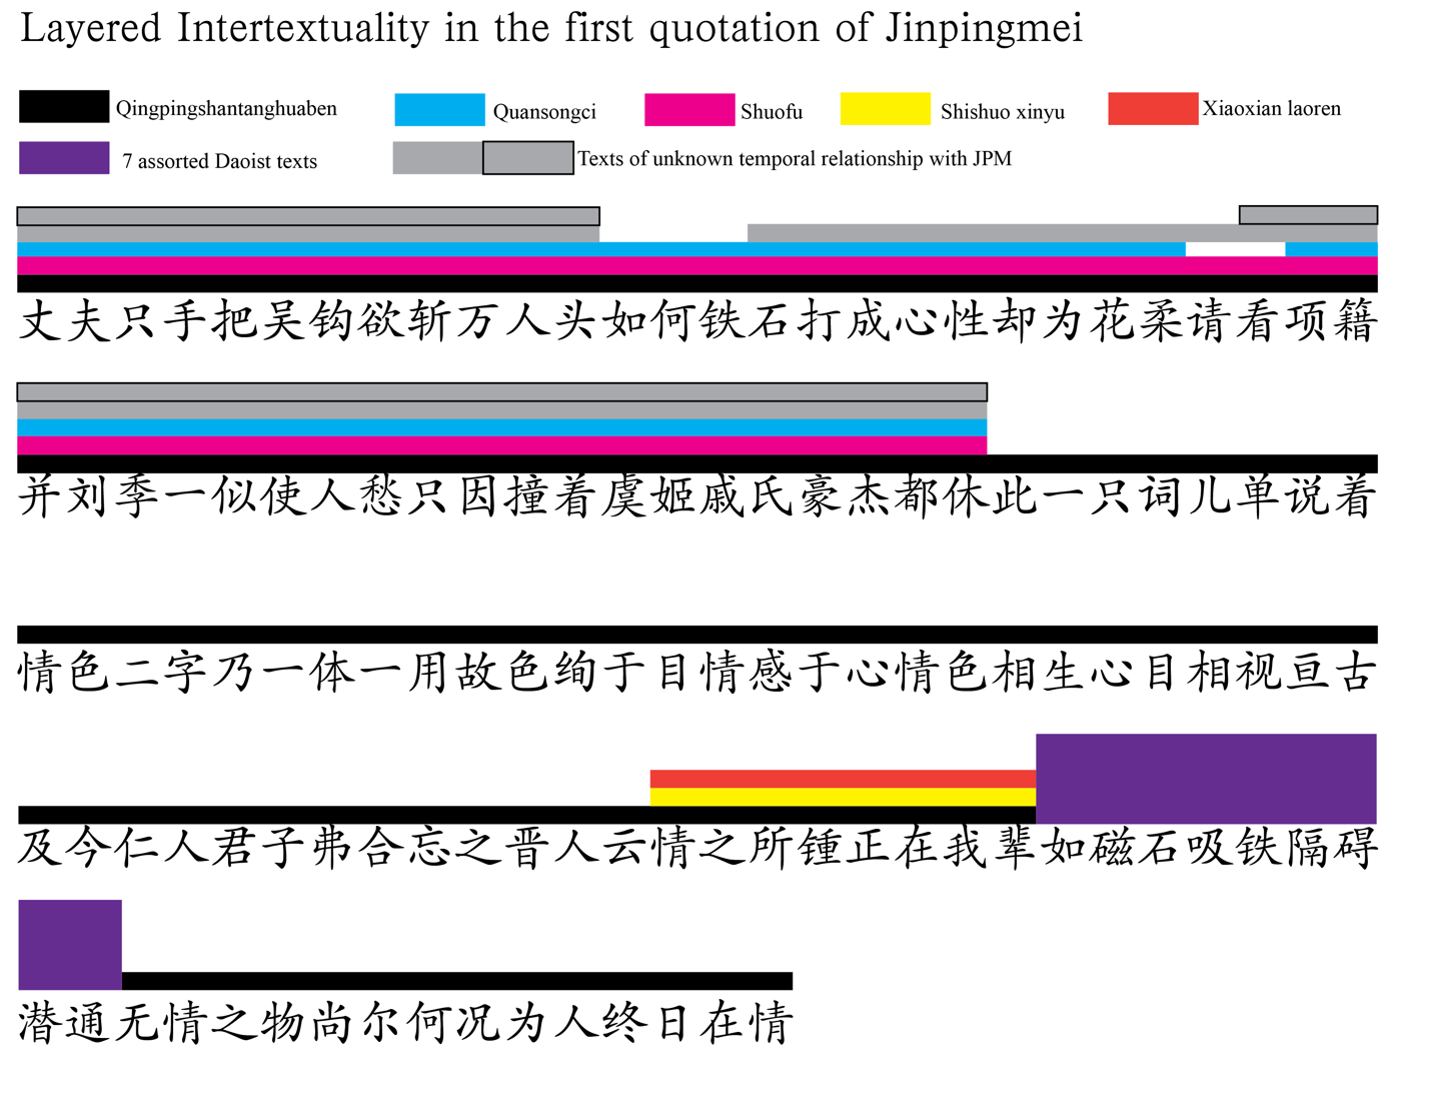

In [83]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 11: Layered Intertextuality in the first quotation of _Jinpingmei_"
            ]

        }
    }
}

display(Image("media/layeredintertextuality.png", width=1000), metadata=metadata)

This process of assessing the nested nature of quotes can significantly narrow the unknown/contemporary quotation space that I need to test (this same sort of nestedness is [well attested to in early Chinese materials on ctext.org](https://ctext.org/tools/parallel-passages)). Keep in mind that this approach is not perfect, particularly given that the author of _Jinpingmei_ may have used multiple versions of the same text to create his narrative. There are still numerous cases where quotes appear in varying lengths across many of the same texts, which can make disambiguating them very difficult. But identifying a single work to compare against _Jinpingmei_ significantly eases the complexity of building a taxonomy of source materials. This is to say that instead of testing the texts represented by every nested quote in the corpus, I can ignore material embedding within longer quotes found in earlier works. In doing so, I can produce the final figure for unknown quotations within _Jinpingmei_, which fills out an initial, but sketchy, source map for the novel among contemporary works.

In [85]:
# simple function to filter out nested quotes (but only if they are tested within quotes known
# to before jinpingmei)
def filter_nested_quotes(intertext_data, metadata):
    range_data = [(int(d[4]), int(d[4])+int(d[2]), i, metadata[d[1]][-1]) for i, d in enumerate(intertext_data)]
    range_data.sort()

    before_ranges = [r for r in range_data if r[3] == "before"]
    other_ranges = [r for r in range_data if r[3] not in ["before", "after"]]

    keep_ranges = set()

    # keep all before ranges
    for before_range in before_ranges:
        keep_ranges.add(before_range[2])

    # iterate through unknown ranges (this is very inefficient but works in a pinch
    for other_range in other_ranges:
        # iterate through before ranges
        keep = True
        for before_range in before_ranges:
            # if the other range is nested in the before range, save

            if other_range[0] >= before_range[0] and other_range[1] <= before_range[1]:
                keep=False
                continue
        if keep:
            keep_ranges.add(other_range[2])

    # return just the kept ranges
    return [d for i,d in enumerate(intertext_data) if i in keep_ranges]

# remove nested quotes
jpm_meta_dict = {d[0]:d for d in jpm_meta}
no_nested_data = filter_nested_quotes(jpm_intertext_data, jpm_meta_dict)

In [86]:
# Figure 12 generation
looking_at = ["unknown","blank"]

# run on unknown material
# one_vs_many_models(jpm_id, jpm_label, jpm_meta,
#             no_nested_data,
#             n_sections,
#             looking_at, length_limit,
#             "Predicted origin of quotes at least 25-characters long, unknown origin",
#             show_summary=False)


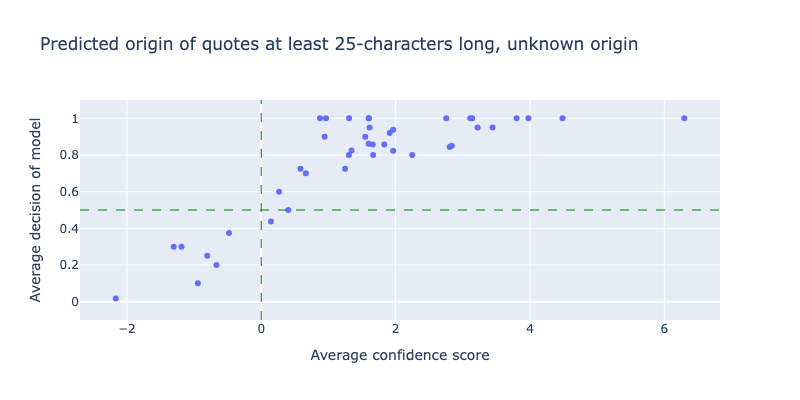

In [87]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 3: Heatmaps of Shared Text in Jinpingmei by Chapter in Unknown Texts"
            ]

        }
    }
}

display(Image("media/predoriginunknown.png", width=1000), metadata=metadata)

This source map is instructive but requires some careful parsing to further our understanding of _Jinpingmei_’s sources. It shows that most contemporary materials are likely sources for the novel, and a careful study of these works will help map out a concrete network of sources. In most of the cases where the model attributes a quote to _Jinpingmei_, it is a poem with _highly_ sexual content. Spending time with these results also helps me identify missing or inaccurate metadata. For example, the model tests the relationship between the _Baduanjin_ 八段錦 collection of short stories and _Jinpingmei_, revealing the former’s clear dependence on the latter.

>After having failed to locate their relatives, and being unable to locate a dwelling on such short notice, they asked our neighbor Old Man Fan if they could stay here for two or three days before moving on. I was planning to report this to you sir, but you have asked me about it before I was able to do so (<cite id="fwz9p"><a href="#zotero%7C7306679%2FQC8JBD8E">(Roy, 2013)</a></cite>, 357). 一時間無尋房住, 央此間鄰居範老來說, 暫住兩三日便去。正欲報知官人, 不想官人來。

This sentence is repeated verbatim with only two minor character variations in _Baduanjin_ and flanked on both sides by many shorter matches that extend across multiple paragraphs. The results are fractured because the people featured in the stories are different and causing the intertextuality algorithm to return multiple shorter substrings. The _Baduanjin_ story is itself likely based on a story from Feng Menglong’s 馮夢龍 _Yushi mingyan_ (Stories to Enlighten the World 喻世明言), which also clearly copies from _Jinpingmei_.

In essence, I can rapidly identify the echos of _Jinpingmei_ in later works and move the _Baduanjin_ from the indeterminate pile into the “clearly after _Jinpingmei_” pile, despite the lack of clarity surrounding its publication history. The _Database of Premodern  Chinese Popular Literature_ (_Zhongguo suwen ku_ 中國俗文庫) lists the _Baduanjin_ as a Ming text (<cite id="il2z2"><a href="#zotero%7C7306679%2FPZUHDBXR">(<i>Zhongguo Su Wen Ku</i>, n.d.)</a></cite>), while the _Zhongguo tongsuxiaoshuo zongmu_ implies it is a Qing work (<cite id="pmwfg"><a href="#zotero%7C7306679%2FW5882J7M">(<i>Zhongguo Tongsu Xiaoshuo Zongmu</i>, 1990)</a></cite>, 638). _Baduanjin_ is a Qing production while others view it as a possible late Ming work.

## Conclusion

One can, and should, approach these results with some amount of suspicion. I expect the model to struggle on strings with certain characteristics. Short quotes, quotes that contain characters appearing in people’s names, and a multitude of other factors can all affect the output. The model is less reliable when the comparison text is a genre that includes very diverse types of writing. It clearly struggles to land on a consistent representation of the style of the _Yongle dadian canjuan_ (_Yongle Encyclopedia Extant Sections_ 永樂大典殘卷) for example. Thus rather than being an ending point, this approach opens a departure point for broader projects. Which of these quotations actually does originate in _Jinpingmei_? Can we weed out incorrect answers with careful scrutiny of the shared quotation material? After all, we can use this approach to make statements about systems of texts, but our confidence plummets when making claims about specific relationships. Would more sophisticated models clear up the inconsistencies we see here? Finally, as these results are all carefully assessed, can these predictions help us narrow down the likely date of completion of _Jinpingmei_? What might that tell us about the author of the novel? What I find particularly exciting about these results is that even in cases where the model is clearly making incorrect decisions, it is doing so in a way that tells us more about intertextual material.

While still highly experimental, this approach to deriving source materials in Jinpingmei may become widely useful in Chinese literary and historical scholarship. Like many similar methodologies, the one outlined in this article is excellent at scale: filling out the rough shapes of the corpus and source material and laying out tantalizing strings to pull at, but it still struggles with the finer philological details when the question at hand demands us to ask “is this specific result accurate?” Fortunately, this is the perfect place for scholars to apply their own expertise. And increasing the general reliability of the results is a matter of refinement (of the corpus, of its associated metadata, and of the vector representations). Importantly, it is valuable for pointing us to sections of shared text that deserve our close evaluation, a task it has already succeeded at.

There is significant utility in being able to computationally assess the nature of intertextuality, even when the complexity of the text at hand is not on par with a work like _Jinpingmei_. The likely direction of shared intertextuality can reveal significant new insights into the development of various literary, historical, and cultural phenomena. It opens more space for using network analysis and may reveal much about the intellectual community behind the productions of unusual works like Jinpingmei. This approach is particularly valuable for less-studied and less-complex works than _Jinpingmei_. As the number of novels, histories, and other materials increase through the Qing dynasty, so too do the number of works relying on multifluous prior materials. At the same time as this scope opens, our ability to pay attention to a significant percent of extant materials falls off. With tools such as these working as a guiding hand, we can start to shed light on otherwise ignored materials. And, as the extent and quality of available corpora increase and machine learning models become ever more easily accessible, approaches like this will become an important part of many scholars’ toolboxes.

## Coda

### Future aproaches
As a closing note, the code in this article is configured in such a way that building multi-class classifiers is as simple as inputting more than two texts into the get_text_and_labels function. This, along with turning to LLMs for more sophisticated document representations, would be an ideal next step in testing the future of this approach. I encourage readers to experiment with this code, and the various parameters I have set above, as there are bound to be significant refinements possible with simple tuning.

### A note on the intertextuality data
Because of the complexity of the code and slow speed of processing, I have included the output of the intertextuality algorithm in the data folder rather than including the code here. I slightly modified the code linked in Vierthaler and Gelein and further developed it to run on config files instead of directly inputting the variables into the code. To recreate the full intertextual results, one simply needs to [run the code found here](https://github.com/vierth/intertextualityjpm).

In [93]:
# The code I have produced makes designing a multiclass classifier easy
text_ids = ["25272", "42420", "25124"]
text_labels = ["Jinpingmei", "Water Margin (70 chapter)", "Water Margin"]

multiple_sections, multiple_labels = get_text_and_labels(text_ids,
                                                 text_labels,
                                                 jpm_intertext_data,
                                                 n_sections, length_range,
                                                 balance_samples=True)

# Vectorize the texts
multiple_vectorizer, multiple_frequency_vectors = vectorize_texts(multiple_sections,
                                                            max_features=max_features,
                                                            use_idf=use_idf,
                                                            ngram_range=ngram_range,
                                                            stop_words=jpm_stopwords)

# Visualize relationshipos
# generate_PCA_viz(multiple_frequency_vectors, multiple_labels, multiple_vectorizer,
#                  "PCA comparing multiple texts")


multiple_clf = train_and_test_model(multiple_frequency_vectors, multiple_labels, print_results=verbose)


# get the shared quotes and the text they originate in
shared_info = get_shared_info(text_ids,
                              text_labels,
                              jpm_intertext_data,
                              limit=length_limit)

# filter down to just shared text and then create vectors
shared_text = [d[0] for d in shared_info]
shared_frequencies = multiple_vectorizer.transform(shared_text)

# make predictions annd get confidence measures of the decisions
shared_pred = multiple_clf.predict(shared_frequencies)
confidence_measures = multiple_clf.decision_function(shared_frequencies)


# create results dictionary
results = {label:0 for label in text_labels}

# populate results dictionary
for p in set(shared_pred):
    results[p] = list(shared_pred).count(p)
if verbose:
    print(results)